# 분석보고서_안정민

In [2]:
# 공통모듈
import pandas as pd
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "../ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

# path = "C:\\Windows\\Fonts\\NanumGothicLight.otf"
# font_name = fm.FontProperties(fname = path).get_name()
# rc("font", family = font_name)

## 지하철 이용현황
<strong>부산-김해 경전철 이용자수</strong>

In [3]:
file_path = '../ref/경상남도 김해시_경전철 역사별 시간대별 승하차 인원 정보_20241225.csv'
gimhea = pd.read_csv(file_path, encoding="EUC-KR")
columns = ['num', 'name', 'type', 'total']
time_col = [f'{i}H' for i in range(0,23)]
columns = columns + time_col + ['00~23H']
gimhea.columns = columns
gimhea = gimhea.loc[:,:'total']
data = gimhea.groupby(['name', 'type']).sum().reset_index()
gdata = data[['name', 'type', 'total']]
gdata = gdata.sort_values(by=['name', 'type'], ascending=[True, True])
mdata = gdata.groupby(by="type").sum().reset_index()
tdata = mdata[['type', 'total']]
sdata = tdata.sort_values(by='total', ascending=False)
total_data = sdata[:]

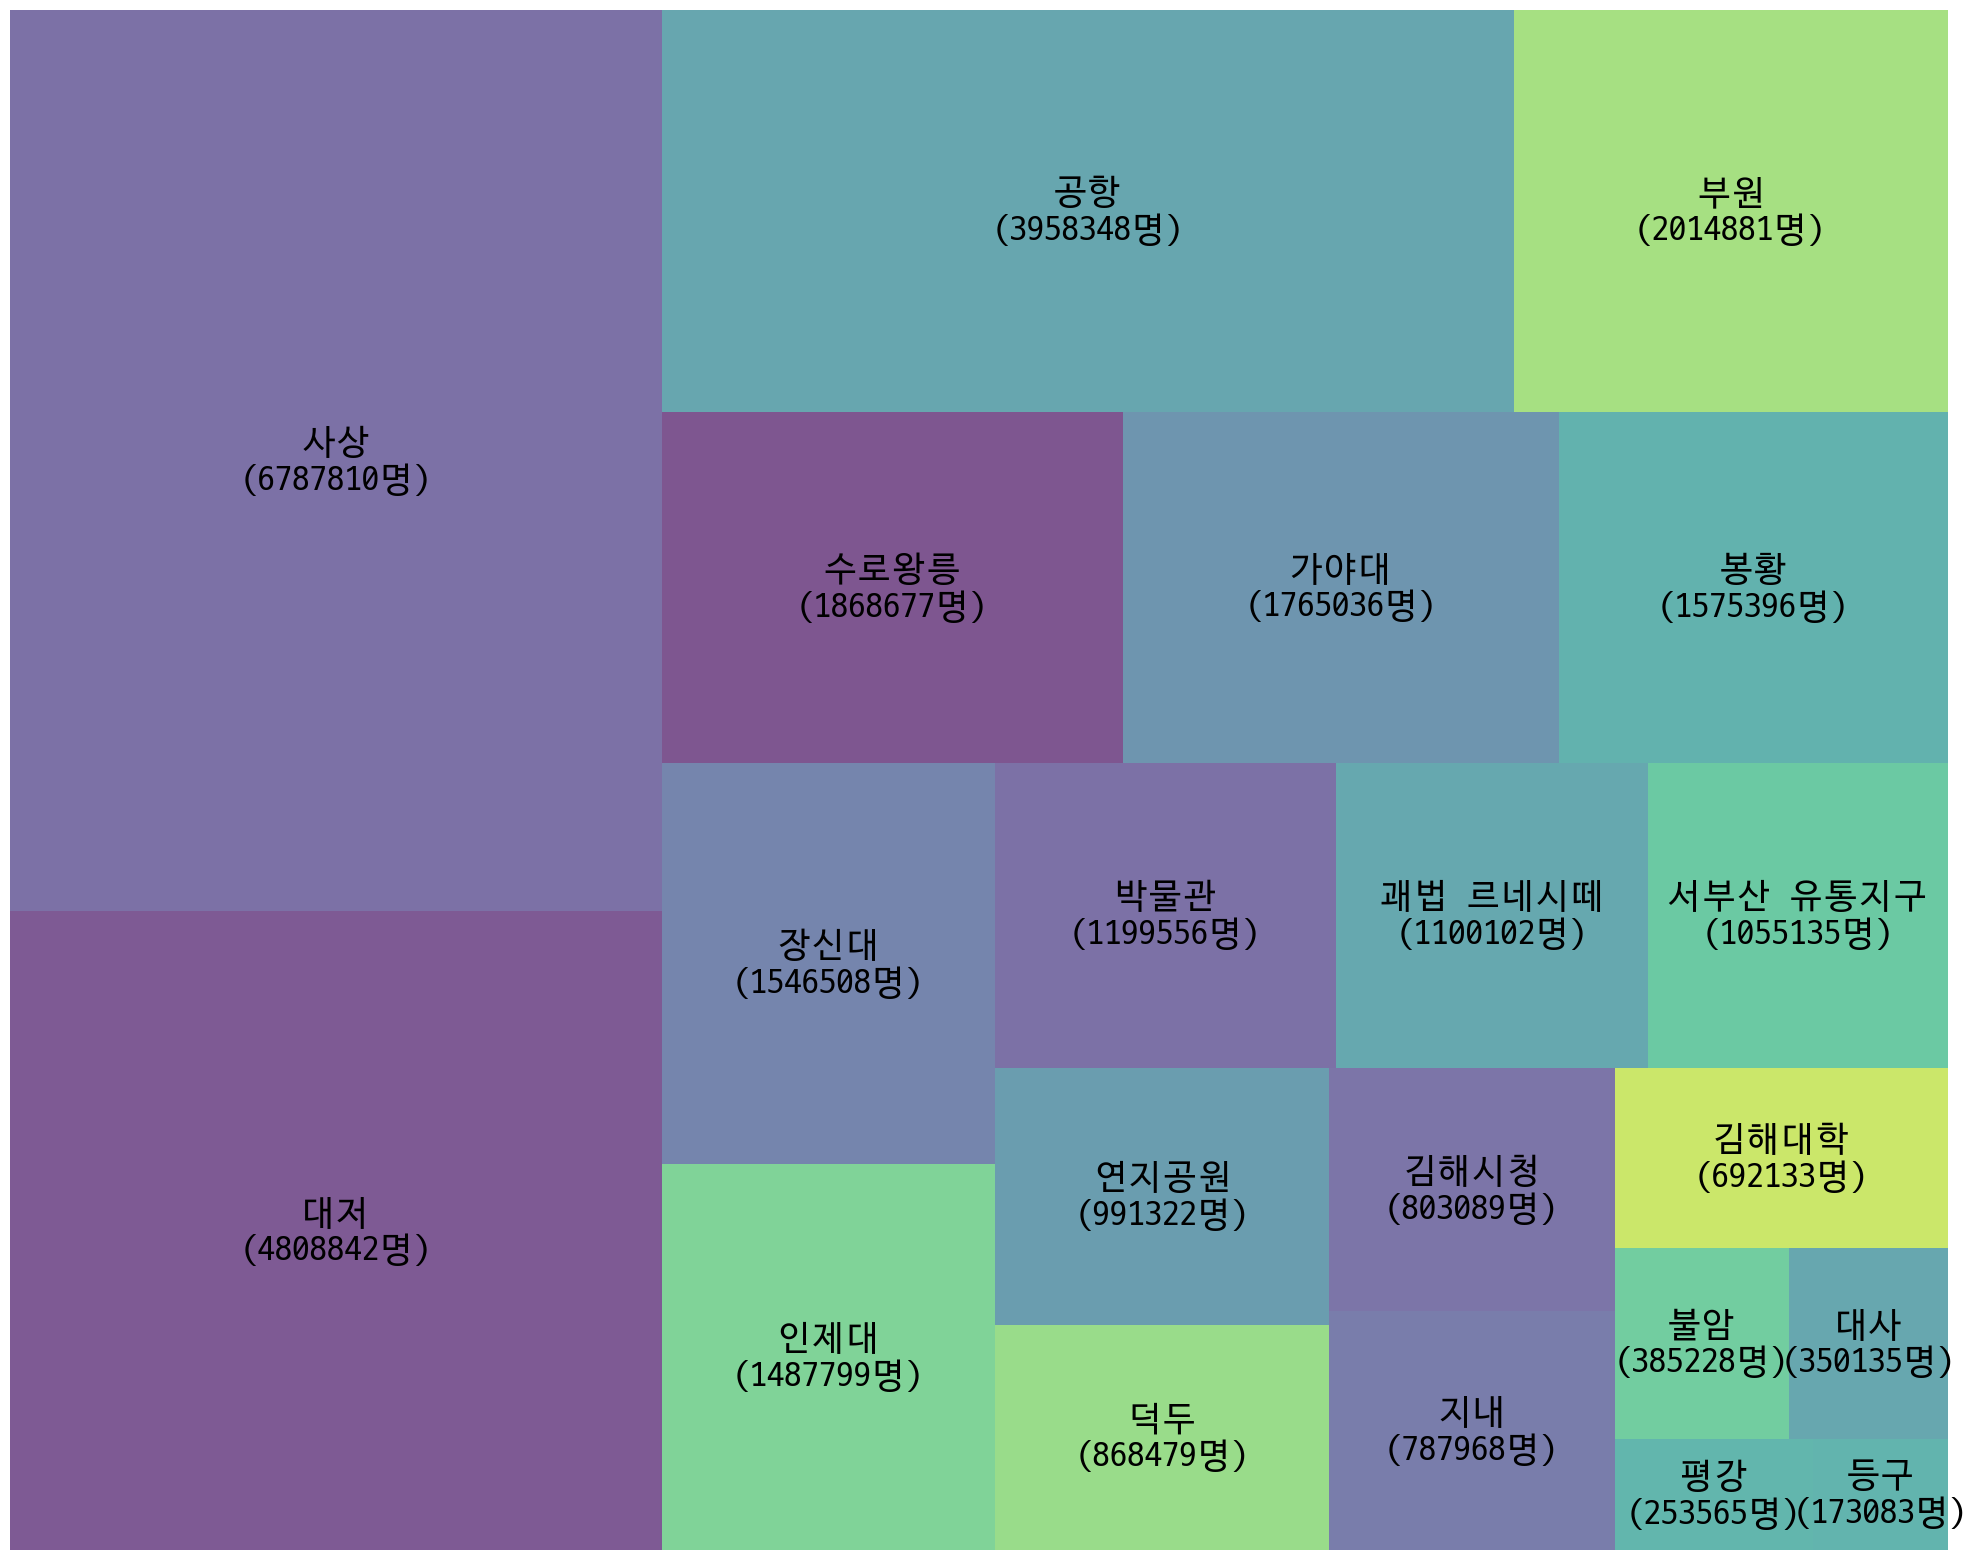


환승 노선이 있는 사상, 대저가 제일 많고 그 다음으로 공항, 아파트 단지가 모여있는 부원, 수로왕릉, 가야대가 많음.


In [6]:
import squarify
plt.figure(figsize=(25,20))
squarify.plot(sizes = total_data['total'], label = [f"{x[0]}\n({x[1]}명)" for x in zip(total_data['type'],total_data['total'])], alpha = 0.7)
plt.rcParams['font.size'] = 25
plt.gca().invert_yaxis()
plt.axis("off")
plt.savefig("subway01.png")
plt.show()
print("\n환승 노선이 있는 사상, 대저가 제일 많고 그 다음으로 공항, 아파트 단지가 모여있는 부원, 수로왕릉, 가야대가 많음.")

## 온라인쇼핑몰
<strong>음식 서비스</strong>

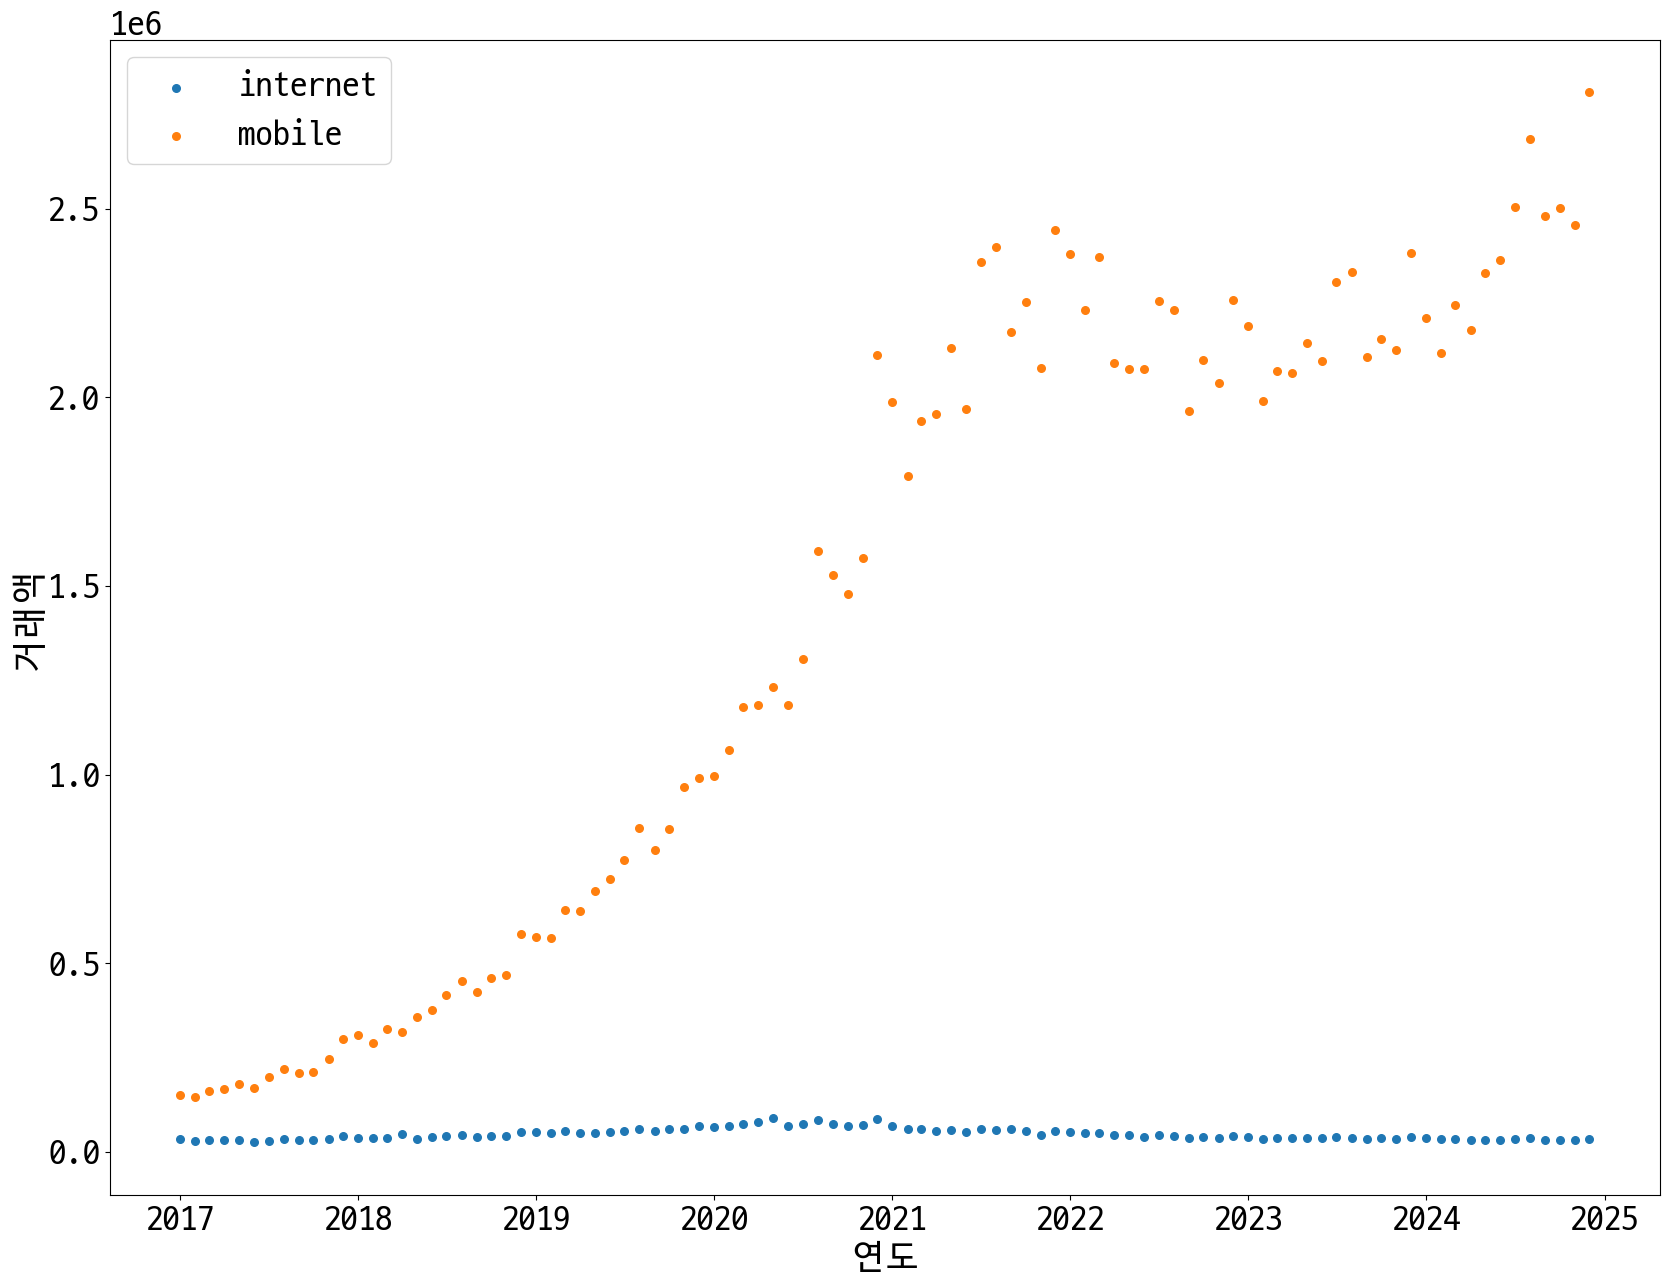


2010년 후반대부터 점점 상승세를 보이다가, 2020년 코로나의 여파로 급증하며 하나의 문화로 정착한 후 현재까지 상승중


In [7]:
file_path = "../ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.columns = ["category", "date", "internet", "mobile"]

ori['date'] = ori['date'].map(lambda x: x.rstrip(' p)'))
ori['date'] = pd.to_datetime(ori["date"], format = '%Y.%m')

ex1_data = ori.copy()
obj = ['컴퓨터 및 주변기기', '의복', '신발', '가방', '음식서비스', '음·식료품', '애완용품', '여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]

fig, ax = plt.subplots(figsize=(20,15))
intmob = ['internet', 'mobile']
category = intmob
for ran in category:
    category_data = ex1_data[ex1_data['category'] == obj[4]]
    x_data = category_data['date']
    y_data = category_data[ran]
    ax.scatter(x_data, y_data, s = 30, label = ran)

ax.set_xlabel("연도")
ax.set_ylabel("거래액")
ax.legend(loc="best")
plt.show()
print("\n2010년 후반대부터 점점 상승세를 보이다가, 2020년 코로나의 여파로 급증하며 하나의 문화로 정착한 후 현재까지 상승중")

# 교통사고

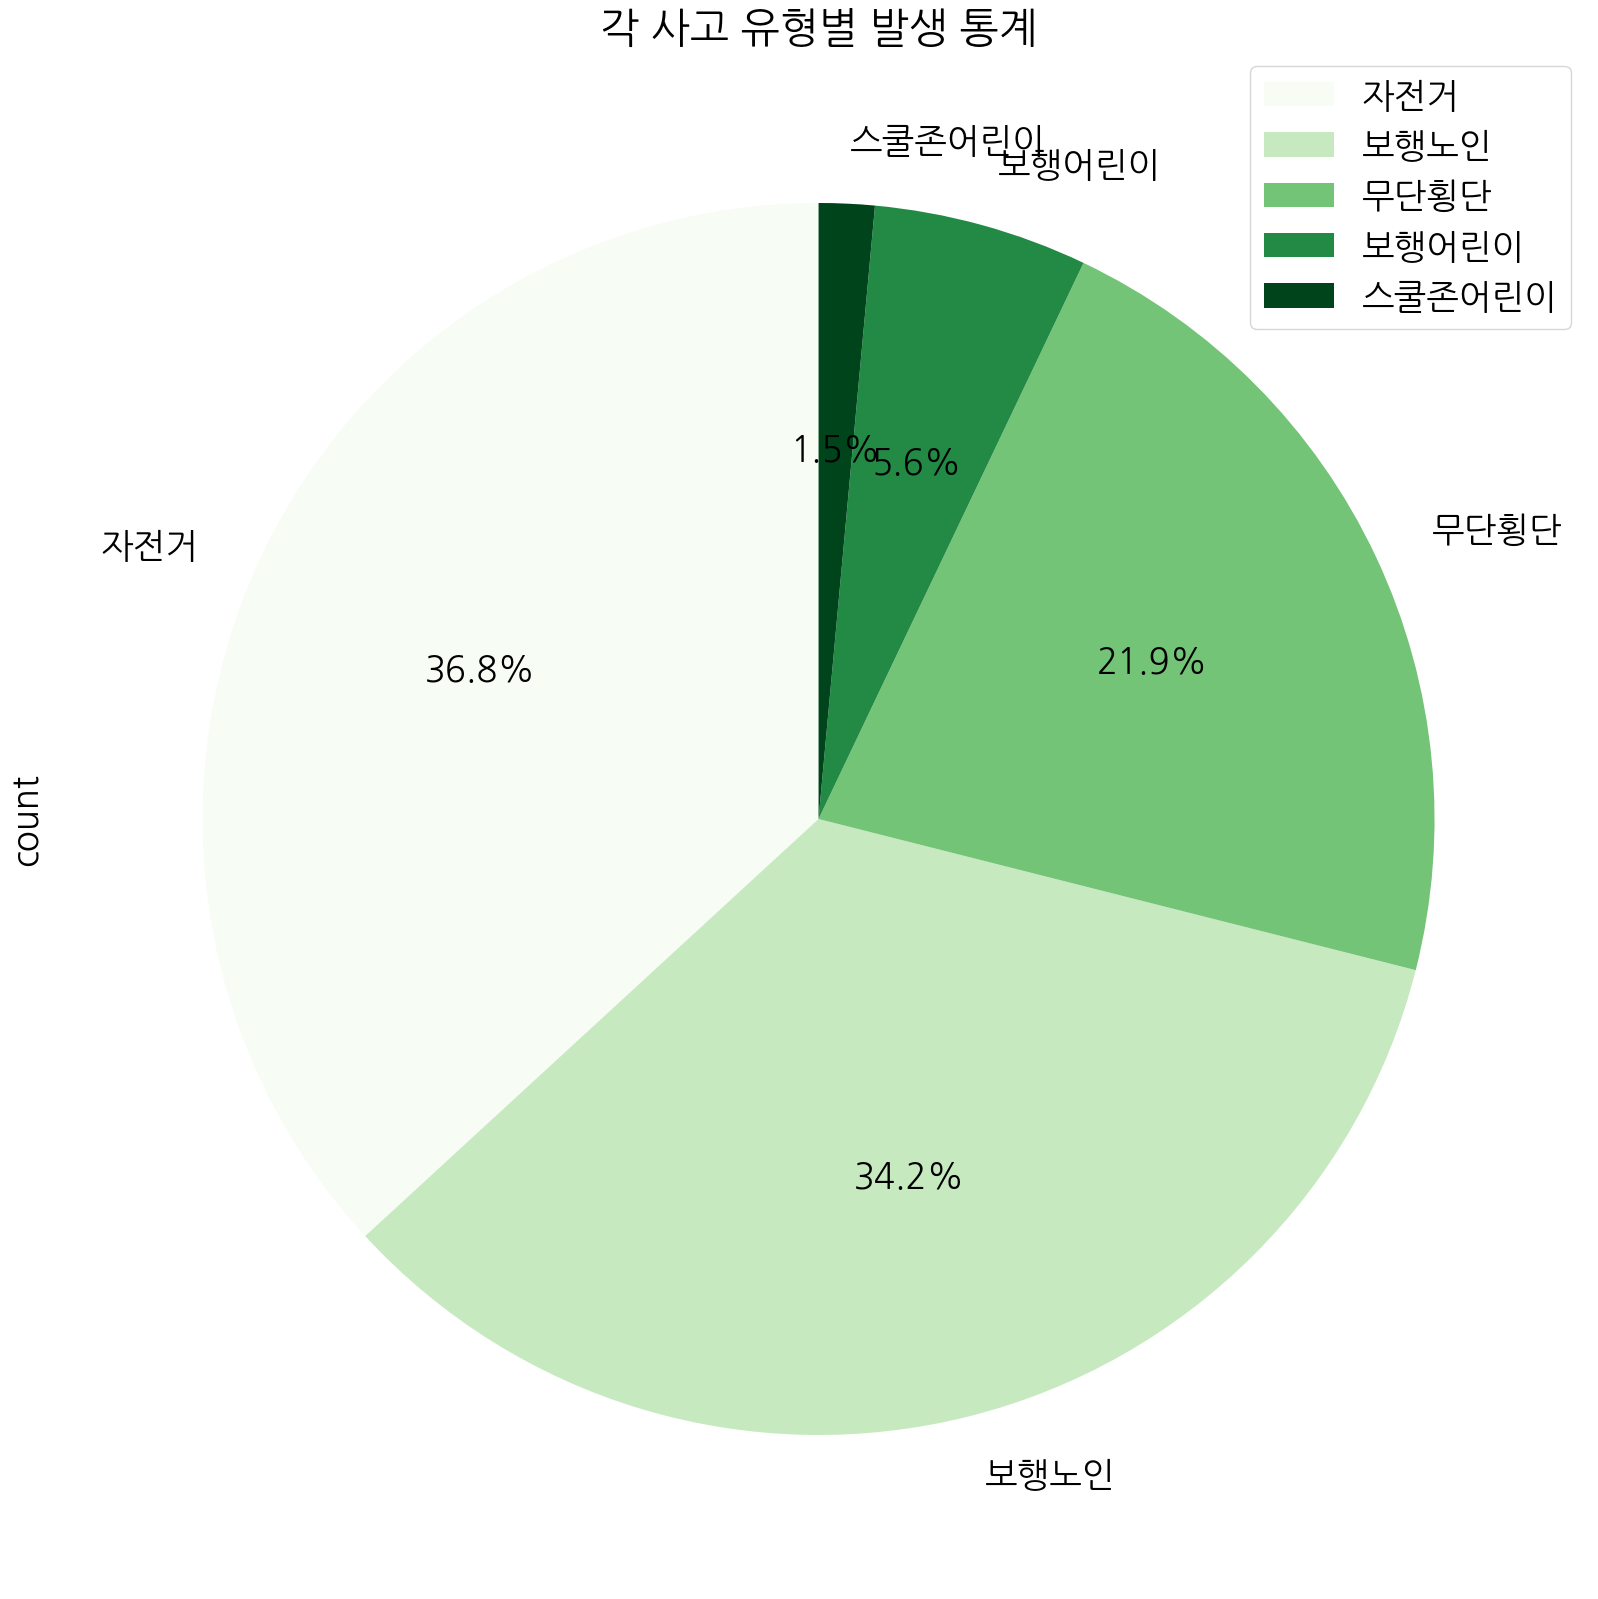

In [19]:
file_path = "../ref/전국교통사고다발지역표준데이터.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")

ori_data = ori.groupby("사고유형구분")["사고건수"].sum().reset_index(name="count")
ori_data = ori_data.sort_values("count", ascending=False)
ori_data = ori_data.rename(columns={"사고유형구분":"type"}) # "사고건수":"count" 이것도 추가 가능

ori_data.plot(kind="pie", y="count", labels=ori_data["type"], figsize=(20,20), startangle=90, autopct="%2.1f%%", title="각 사고 유형별 발생 통계", cmap=plt.cm.Greens)
plt.show()

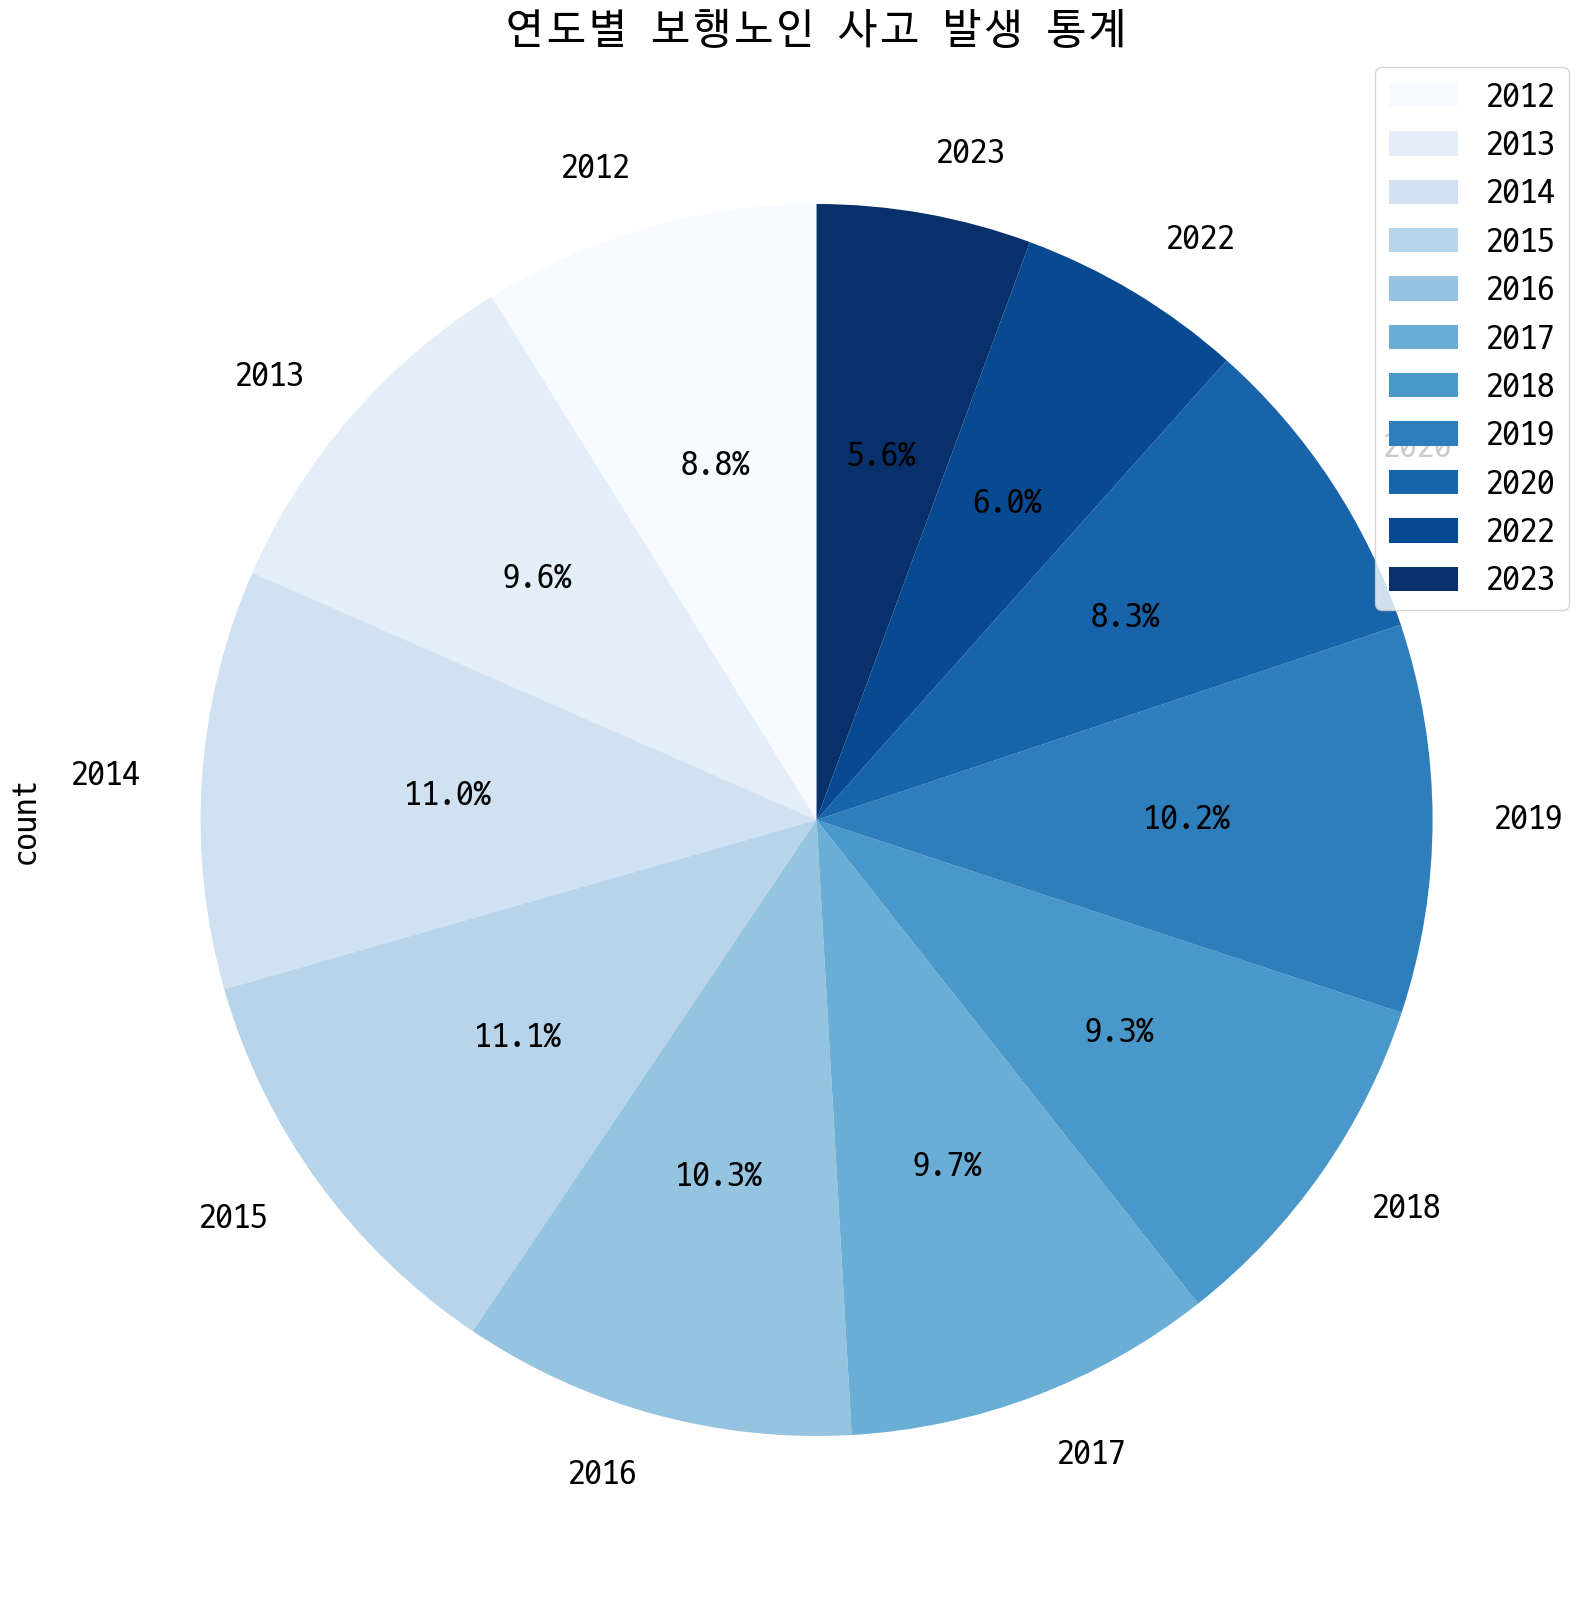

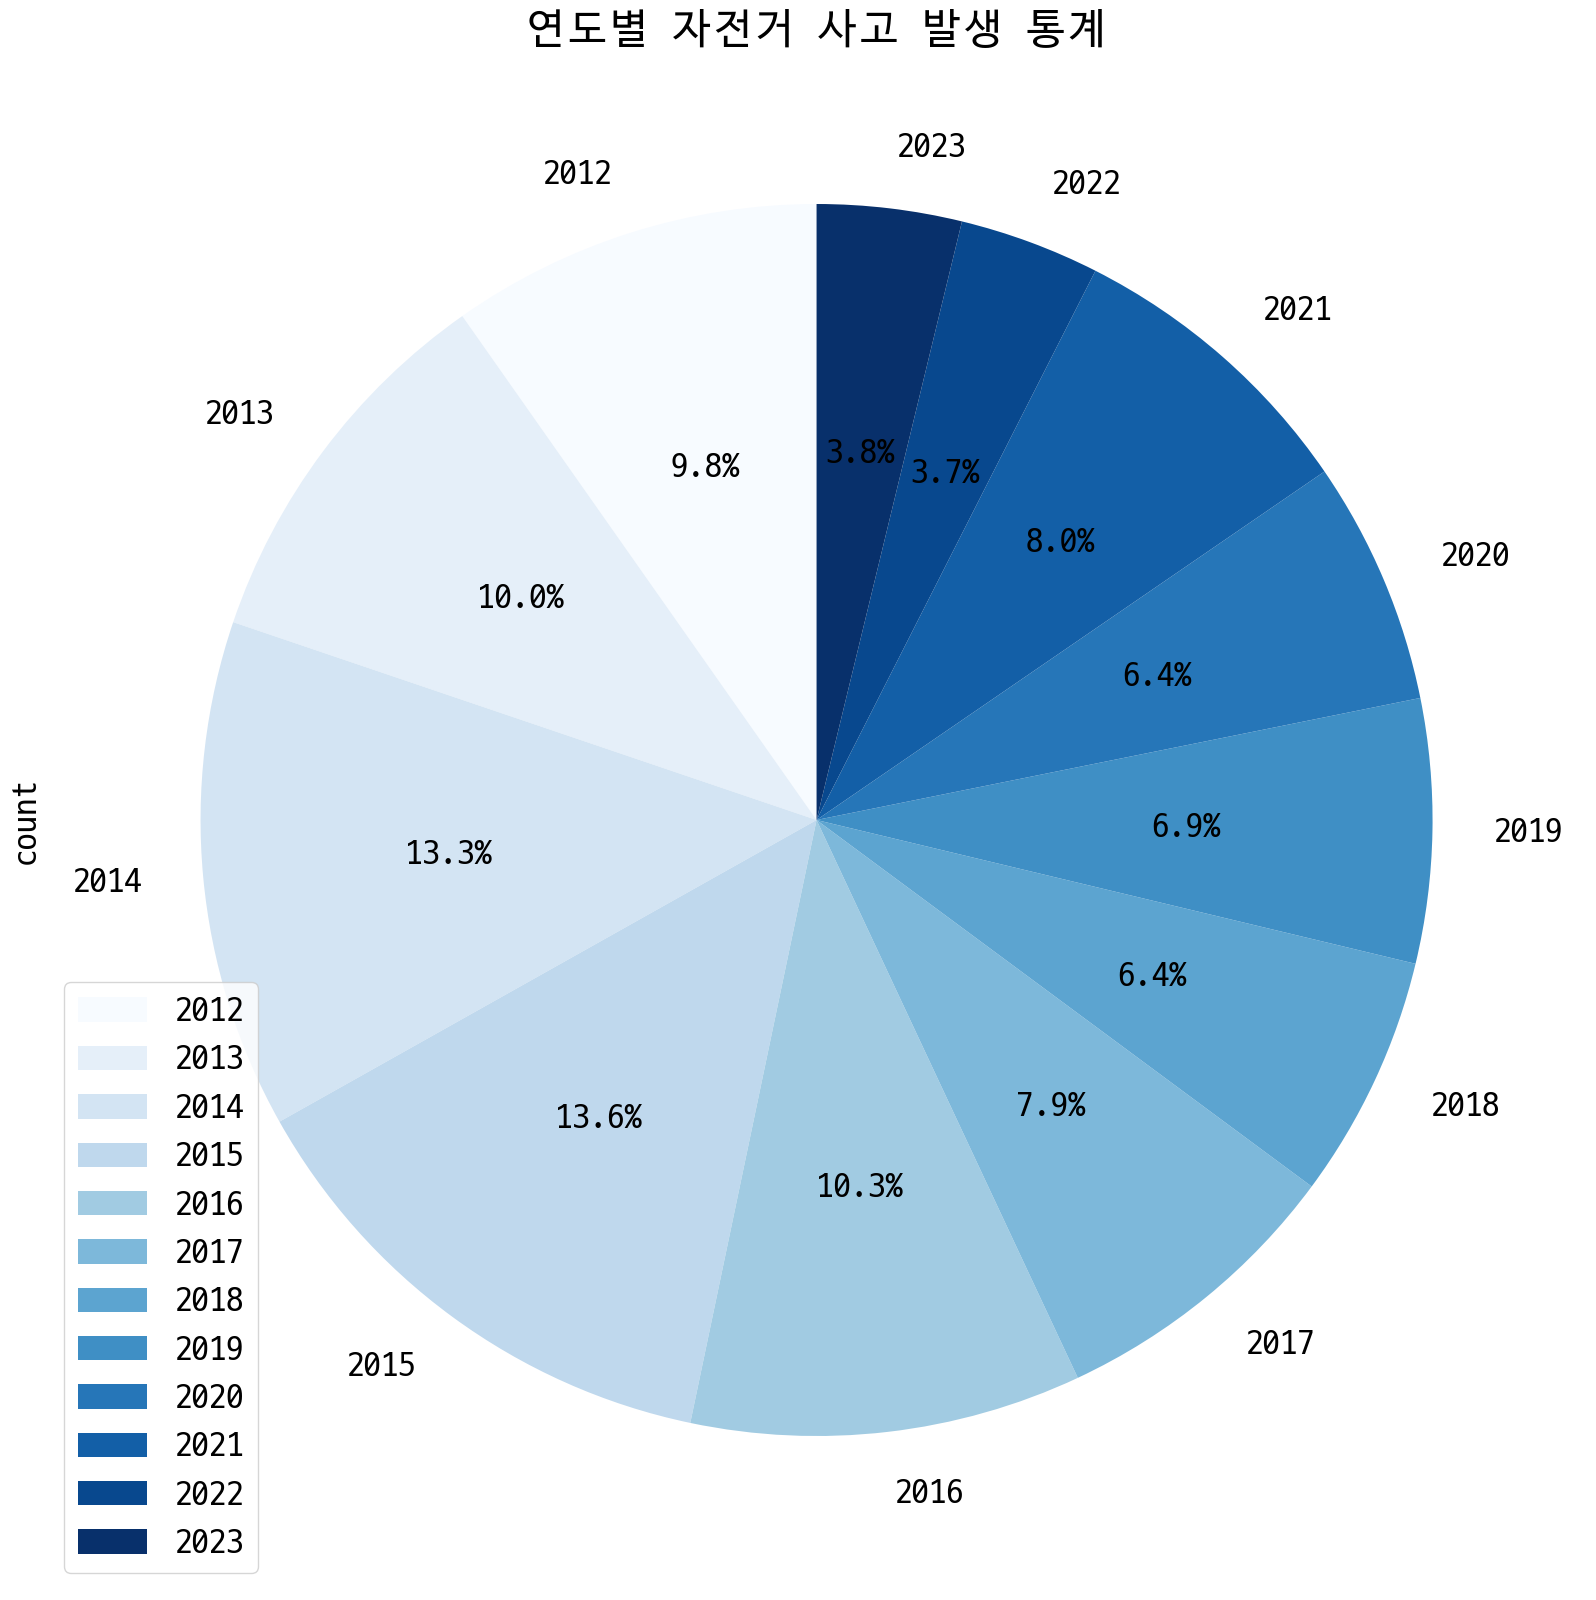

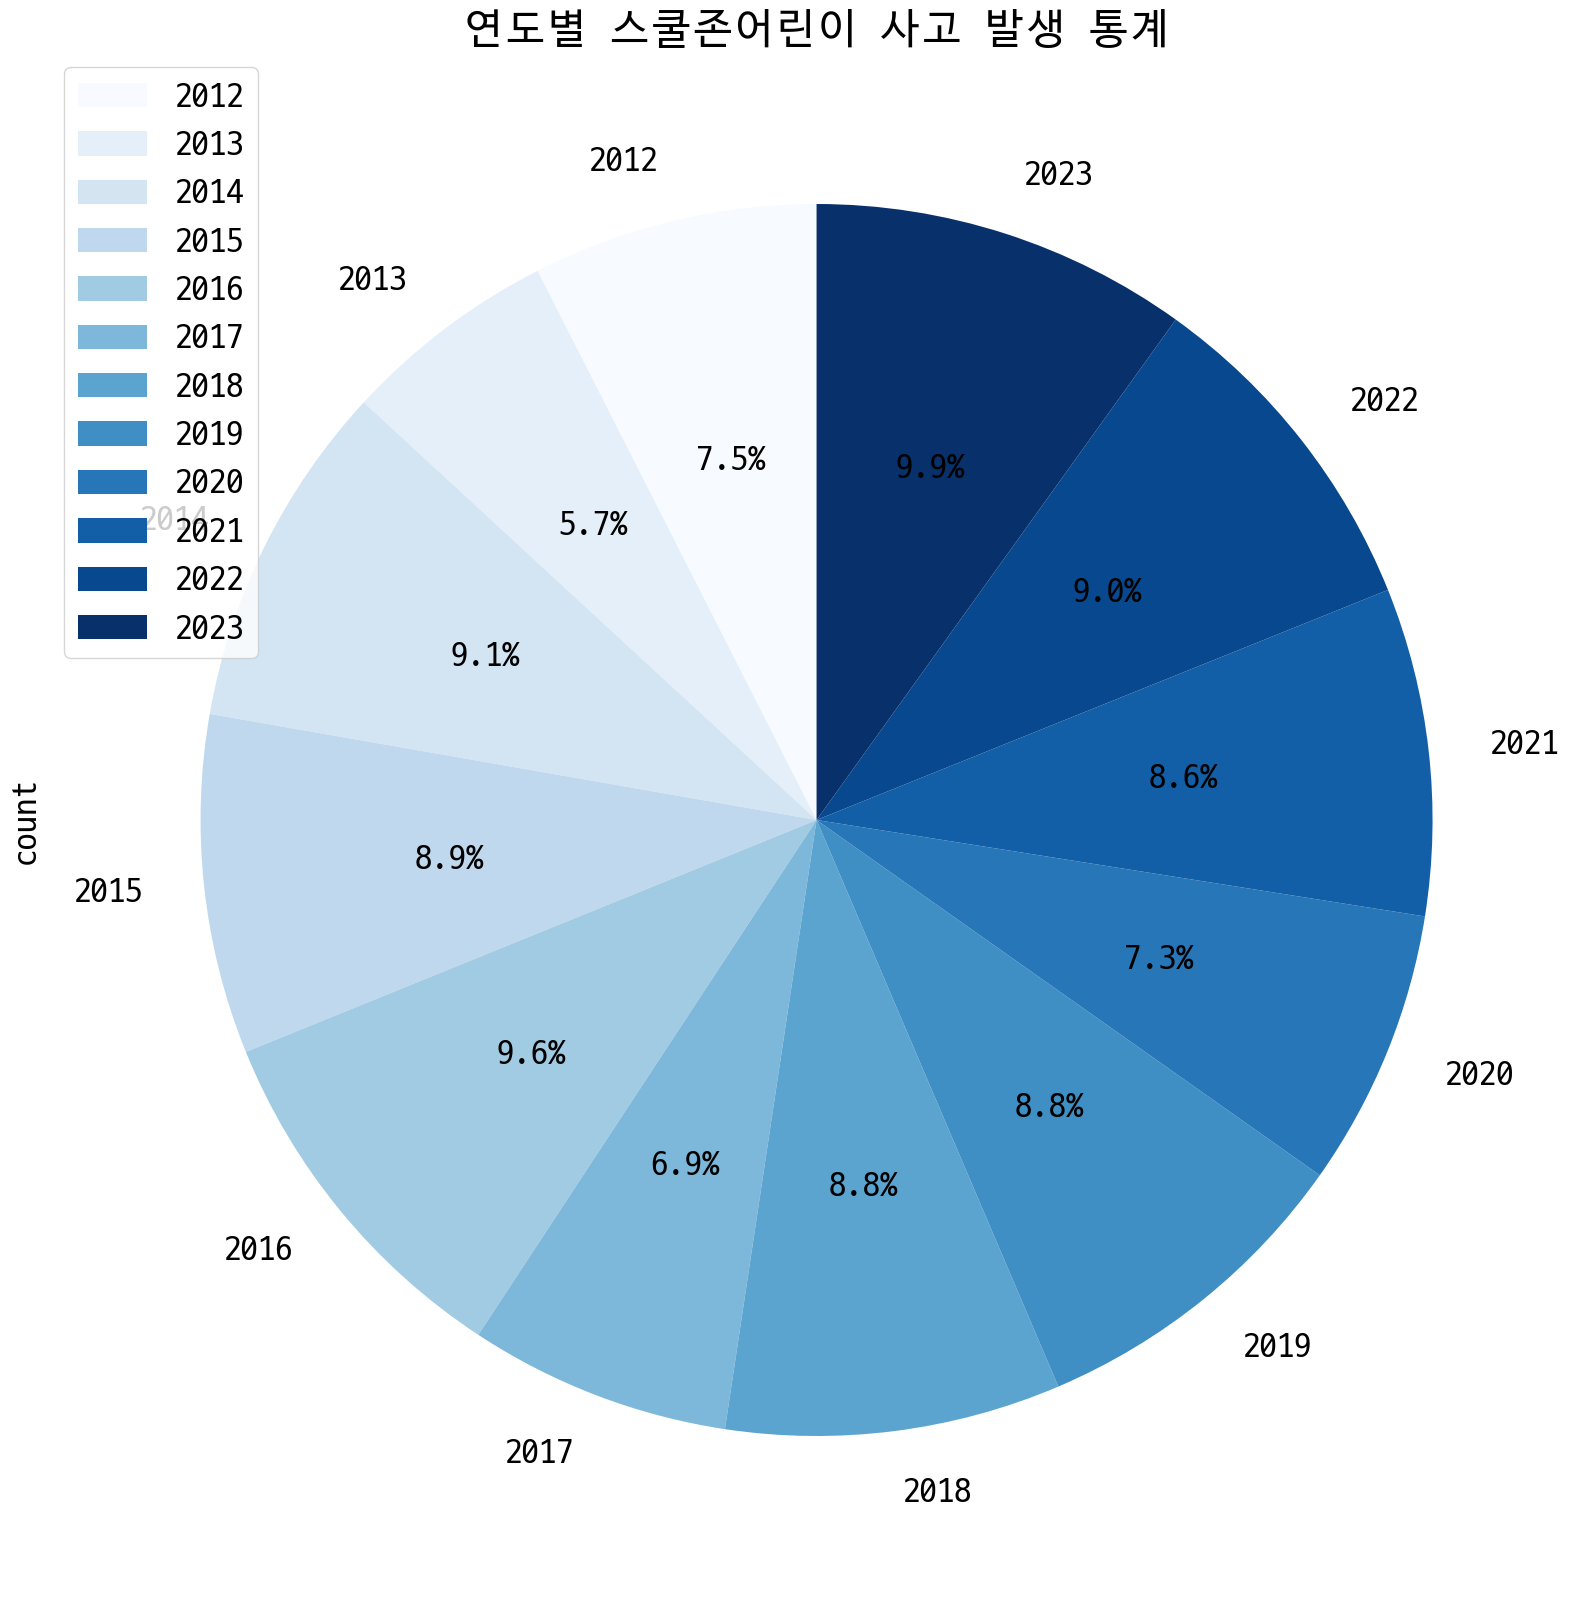

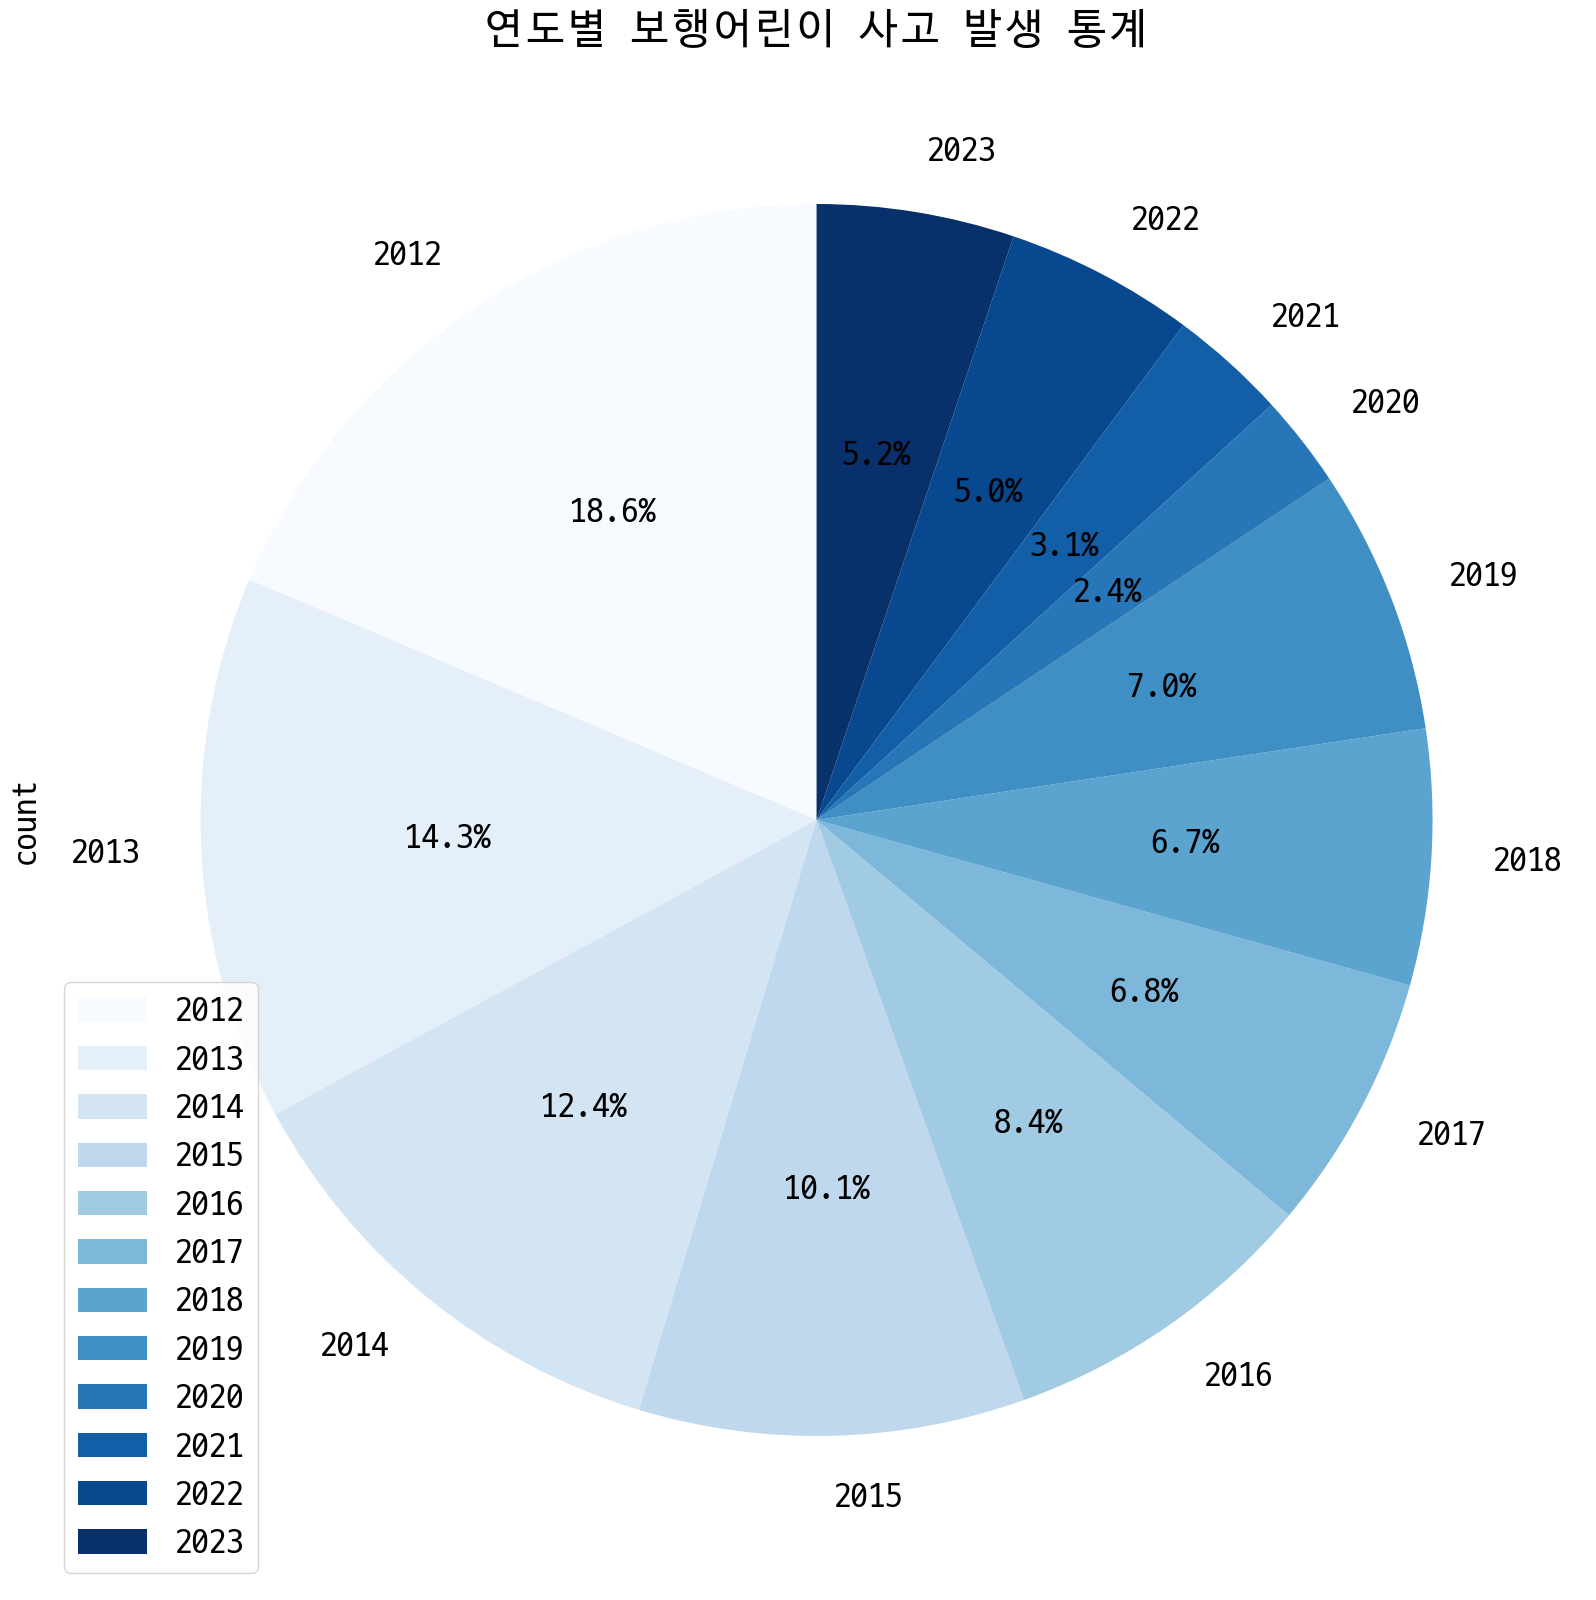

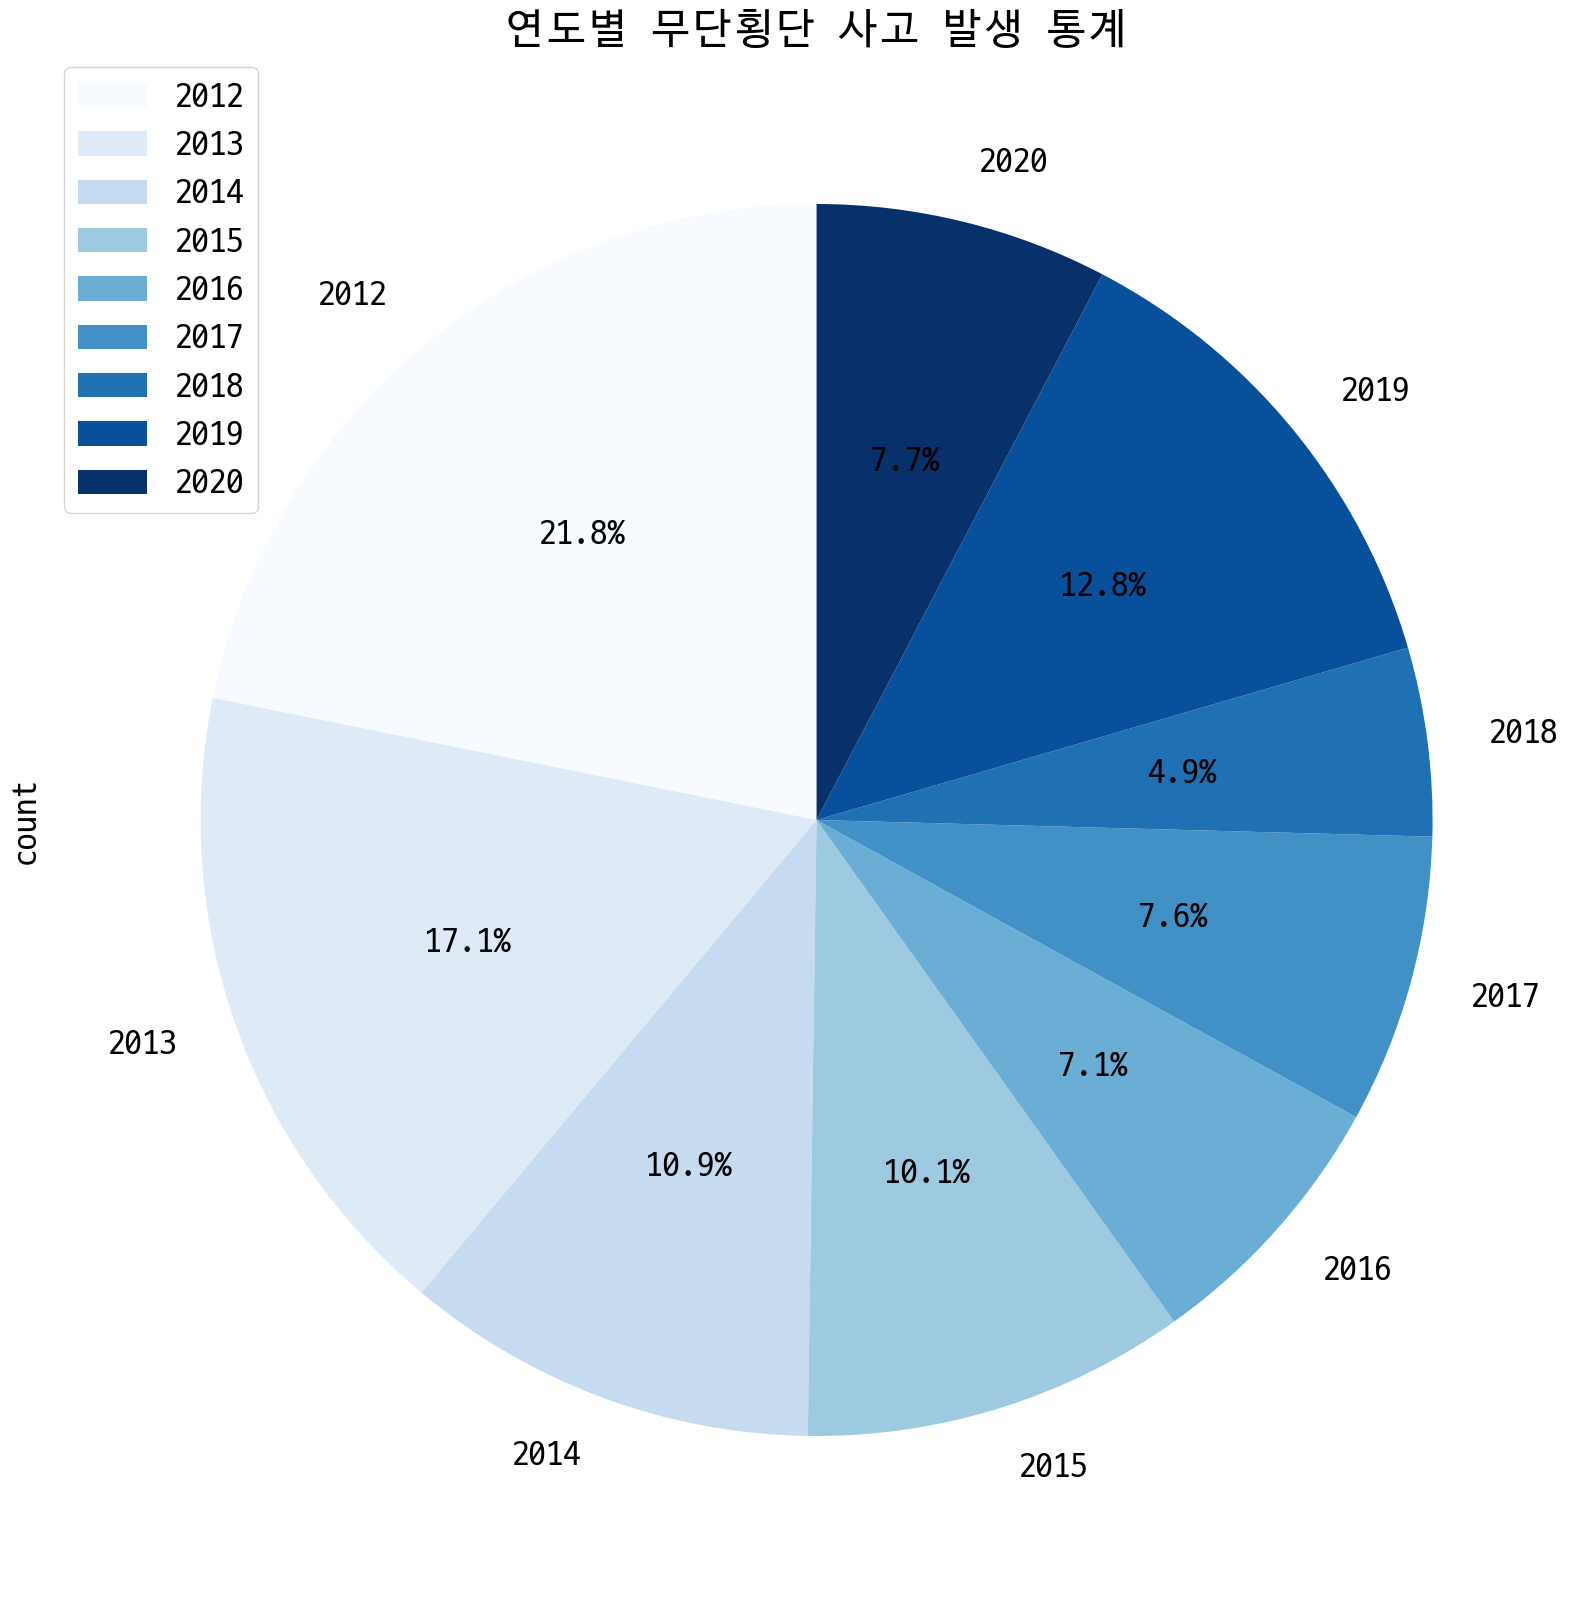

In [7]:
ex_data = ori.copy()
ex_data = ex_data.rename(columns={"사고연도":"year", "사고유형구분":"type", "사고건수":"accident"})
ex_data
arr_data = list(set(ex_data["type"]))
data_list = []
for t in arr_data:
    data_list.append(ex_data[ex_data["type"]==t])

total_list = []
for d in data_list:
    result = d.groupby("year")["accident"].sum().reset_index(name="count")
    total_list.append(result)
# print(arr_data, total_list)
for i in range(len(arr_data)):
    total_list[i].plot(
        kind = "pie", 
        y = "count", 
        labels = total_list[i]["year"], 
        figsize = (20,20), 
        startangle = 90,
        autopct = "%.1f%%",
        title = f"연도별 {arr_data[i]} 사고 발생 통계",
        cmap = plt.cm.Blues)
    plt.show()

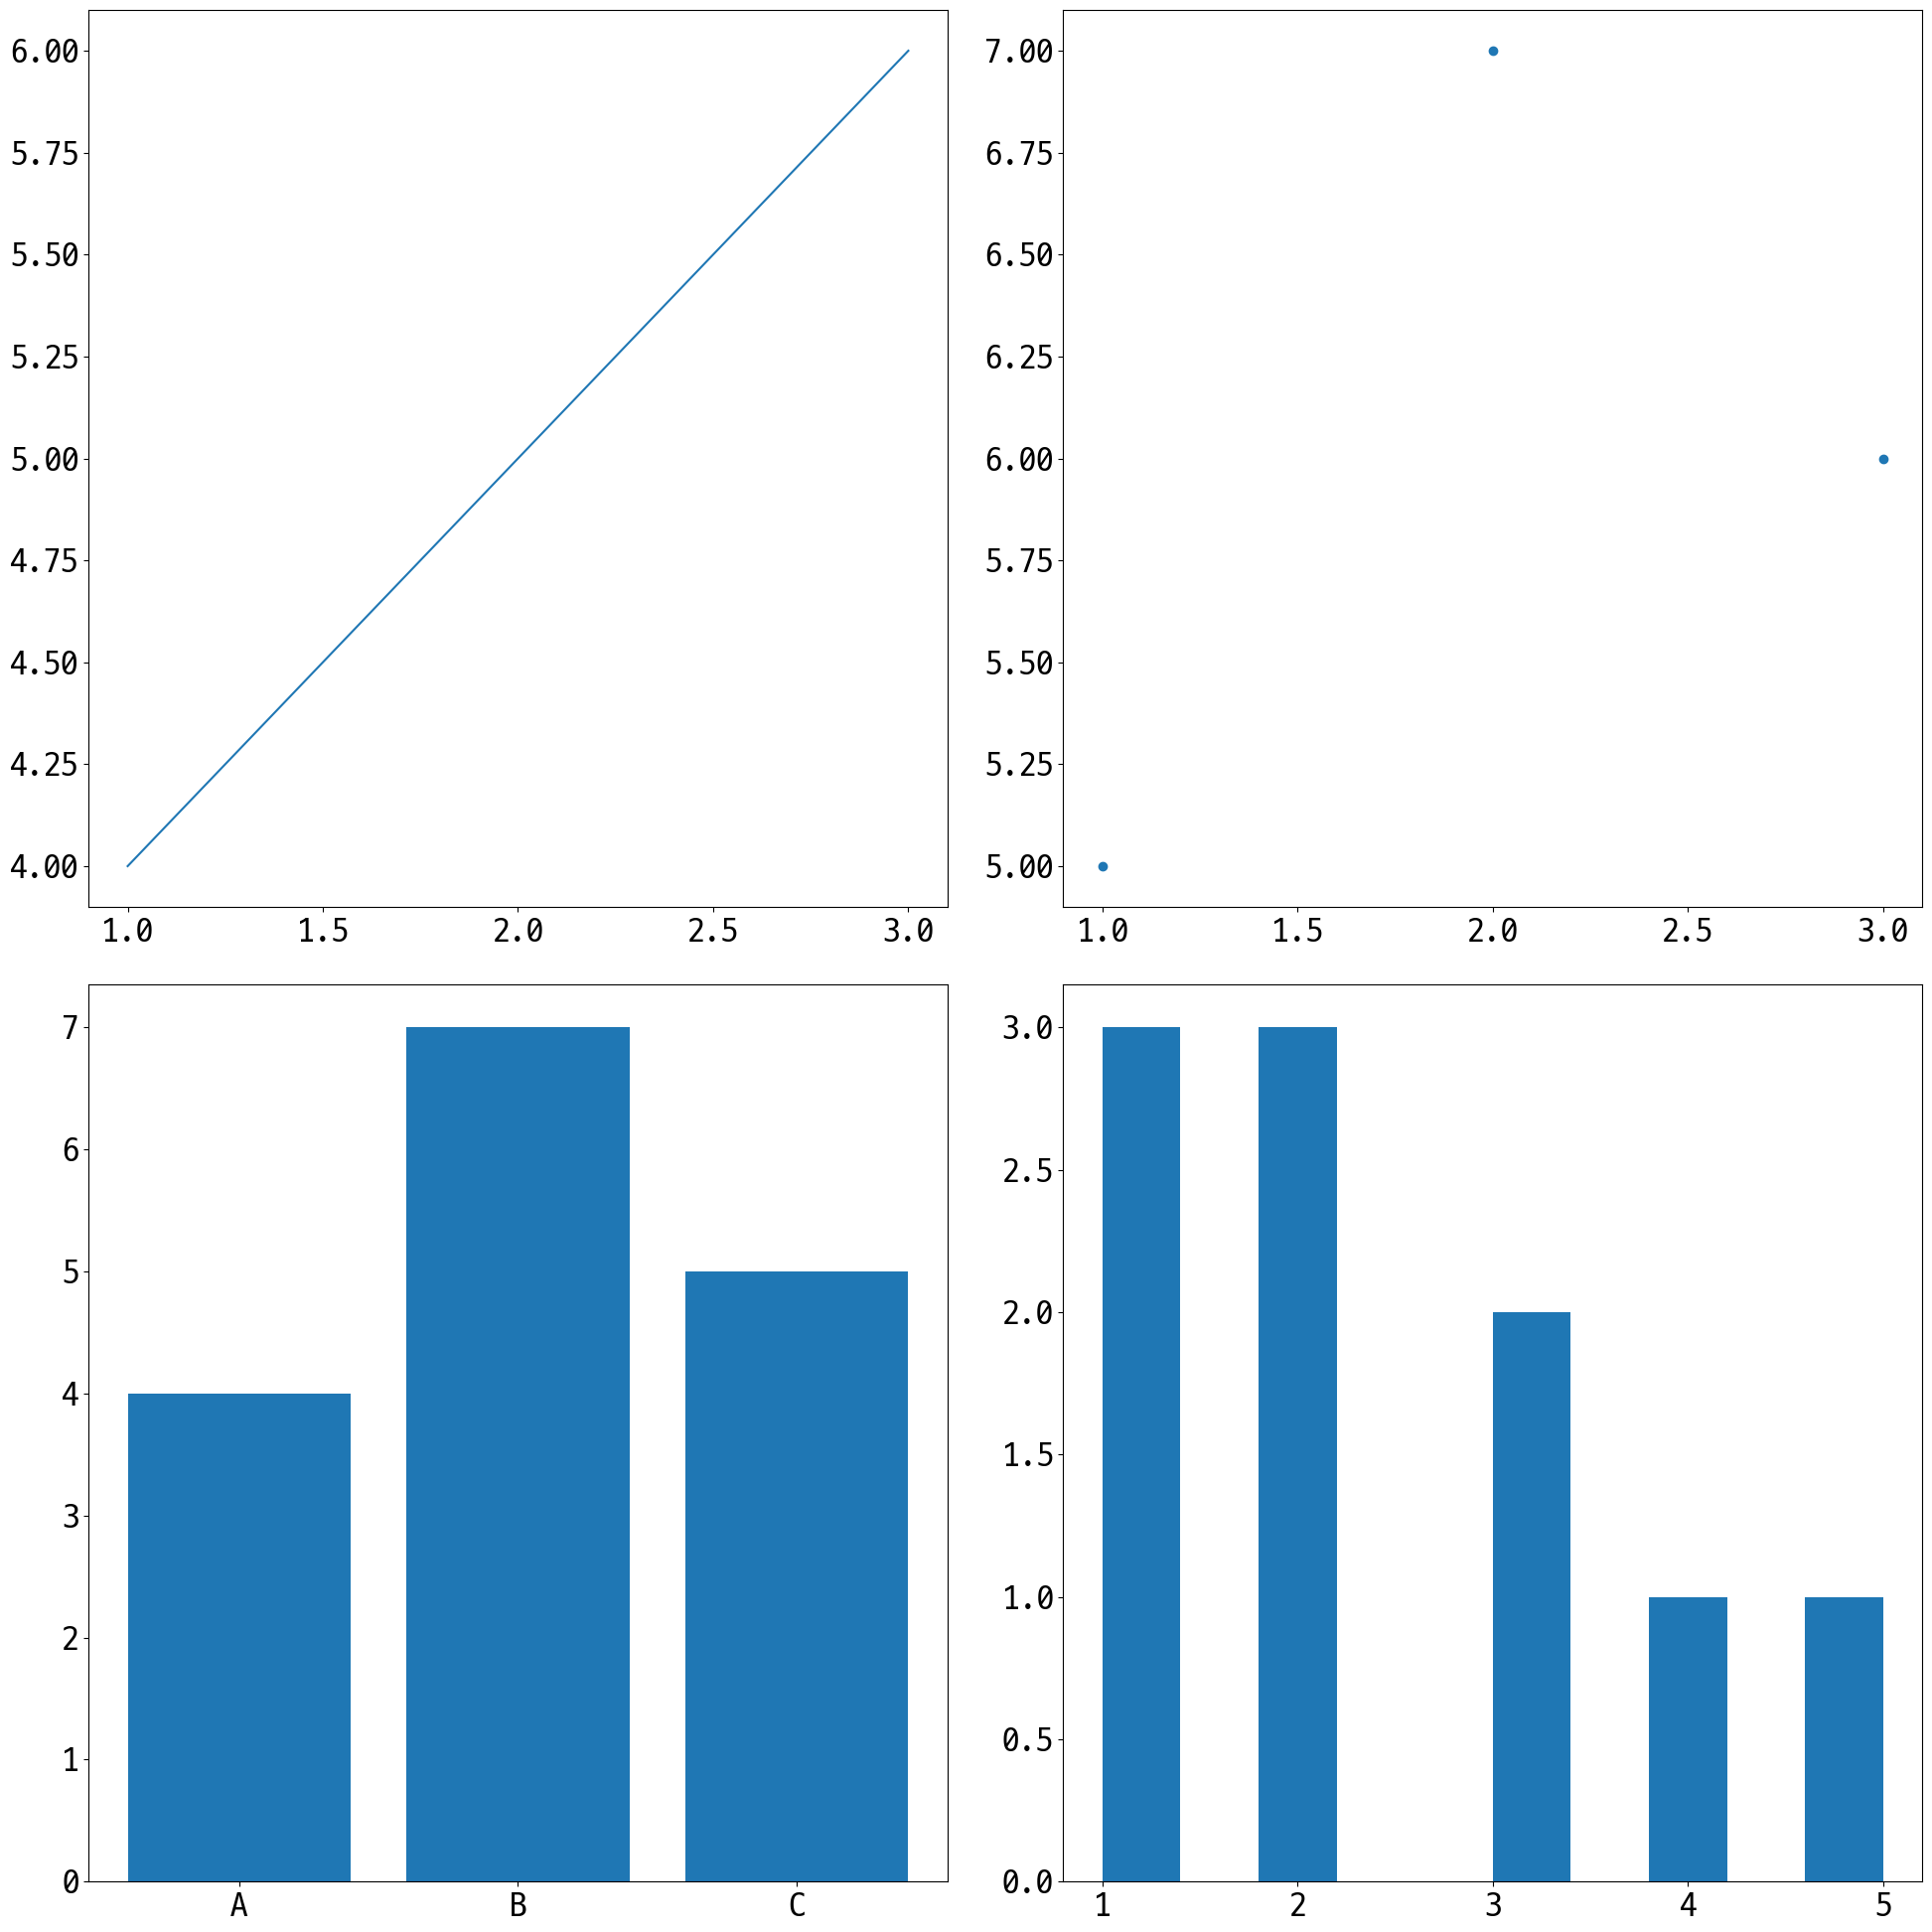

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(20,20))  # 2*2 서브플롯 생성

axs[0,0].plot([1,2,3],[4,5,6])
axs[0,1].scatter([1,2,3],[5,7,6])
axs[1,0].bar(['A','B','C'],[4,7,5])
axs[1,1].hist([1,1,2,3,4,5,1,2,3,2],bins=10)
plt.tight_layout()
plt.show()

## 청소년 정신건강
<strong>2022년부터 2024년까지 통계</strong>

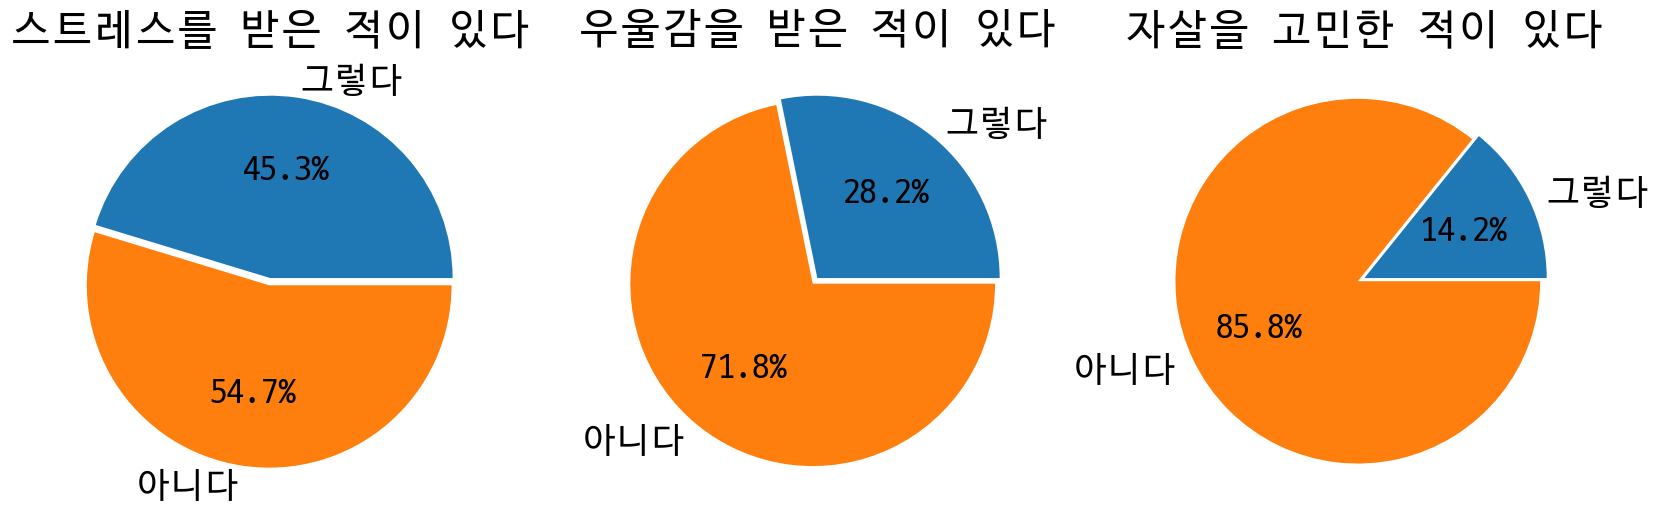

In [9]:
file_path = "../ref/청소년정신건강_20250304.csv"
ori = pd.read_csv(file_path)
new_name = ["시점", "스트레스", "스트레스남학생", "스트레스여학생", "우울감경험률", "우울남학생", "우울여학생", "자살생각률", "자살남학생", "자살여학생"]
ori.columns = new_name
ori = ori.loc[1:, "스트레스":]

ori.loc[2] = 100 - ori.loc[1,"스트레스":].astype(float)
ori["응답"] = ["그렇다", "아니다"]
ori = ori.set_index("응답")

fig, ax = plt.subplots(1,3,figsize=(20,20))
ori["스트레스"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[0], autopct = "%.1f%%")
ax[0].set_title("스트레스를 받은 적이 있다")
ax[0].set_ylabel("")

ori["우울감경험률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[1], autopct = "%.1f%%")
ax[1].set_title("우울감을 받은 적이 있다")
ax[1].set_ylabel("")

ori["자살생각률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[2], autopct = "%.1f%%")
ax[2].set_title("자살을 고민한 적이 있다")
ax[2].set_ylabel("")

plt.show()

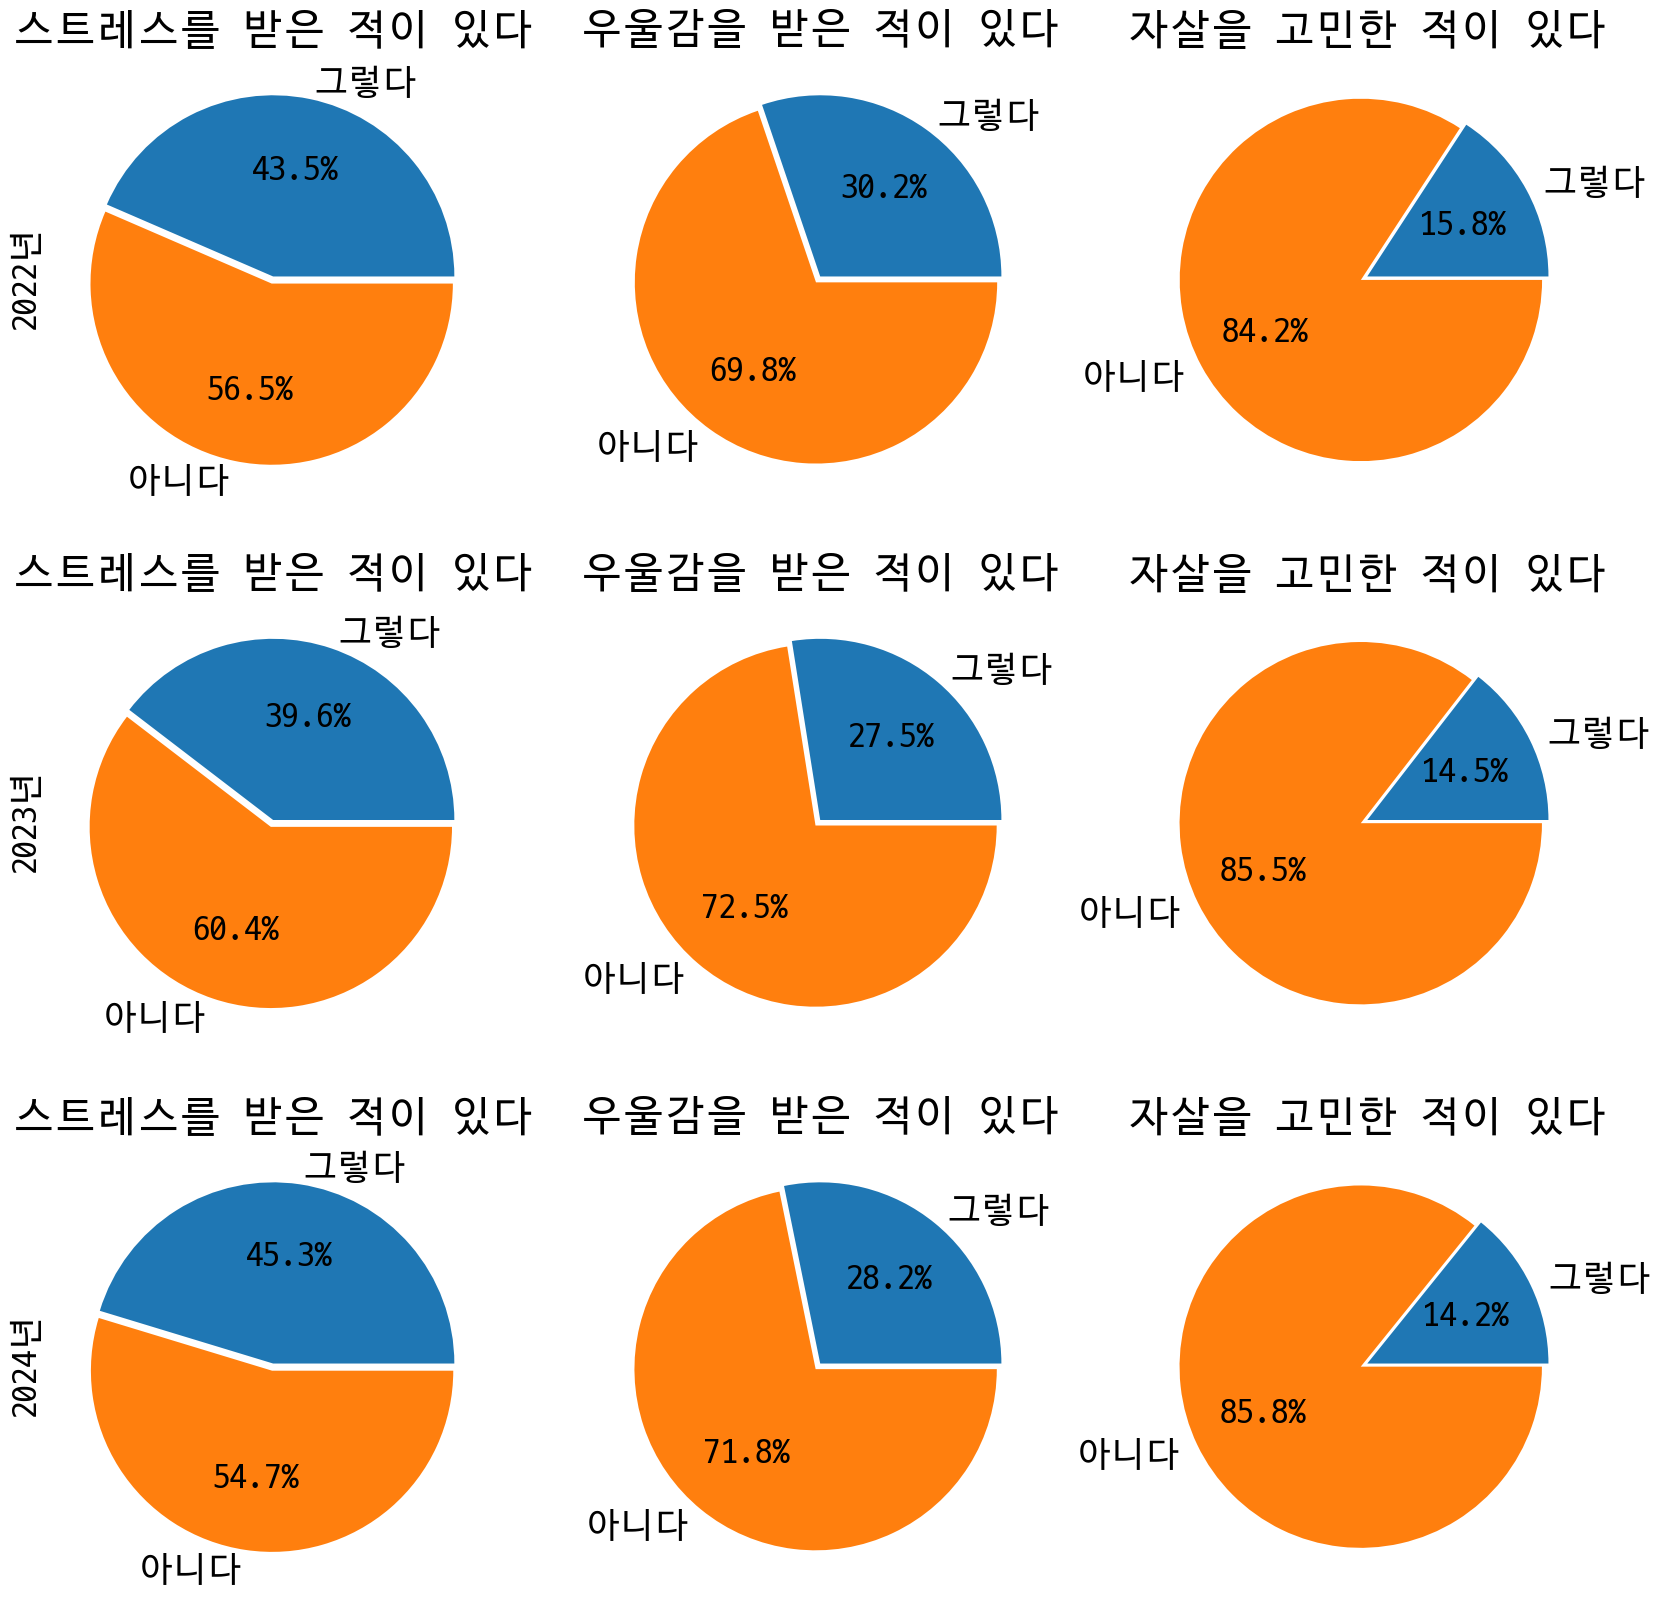


22년부터 24년까지의 결과가 다 비슷하게 나오고있지만 23년 스트레스 인원은 약간 적은 편


In [12]:
file_path = "../ref/청소년정신건강_20232022.csv"
ori_23 = pd.read_csv(file_path)

new_name = ["시점", "스트레스", "스트레스남학생", "스트레스여학생", "우울감경험률", "우울남학생", "우울여학생", "자살생각률", "자살남학생", "자살여학생"]
ori_23.columns = new_name
ori_23 = ori_23.loc[1:, "스트레스":]

ori_22 = ori_23.loc[:1,:]
ori_23 = ori_23.loc[2:,:]

ori_22.loc[2] = 100 - ori_22.loc[1,"스트레스":].astype(float)
ori_22["응답"] = ["그렇다", "아니다"]
ori_22 = ori_22.set_index("응답")

ori_23.loc[3] = 100 - ori_23.loc[2,"스트레스":].astype(float)
ori_23["응답"] = ["그렇다", "아니다"]
ori_23 = ori_23.set_index("응답")

fig, ax = plt.subplots(3,3,figsize=(20,20))
for i in range(0,3):
    if i == 0:
        df = ori_22
    elif i == 1:
        df = ori_23
    elif i == 2:
        df = ori
        
    df["스트레스"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[i][0], autopct = "%.1f%%")
    ax[i][0].set_title("스트레스를 받은 적이 있다")
    ax[i][0].set_ylabel(f"202{i+2}년")
    
    df["우울감경험률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[i][1], autopct = "%.1f%%")
    ax[i][1].set_title("우울감을 받은 적이 있다")
    ax[i][1].set_ylabel("")
    
    df["자살생각률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[i][2], autopct = "%.1f%%")
    ax[i][2].set_title("자살을 고민한 적이 있다")
    ax[i][2].set_ylabel("")

plt.show()
print("\n22년부터 24년까지의 결과가 다 비슷하게 나오고있지만 23년 스트레스 인원은 약간 적은 편")

## 연령별 취업자 수

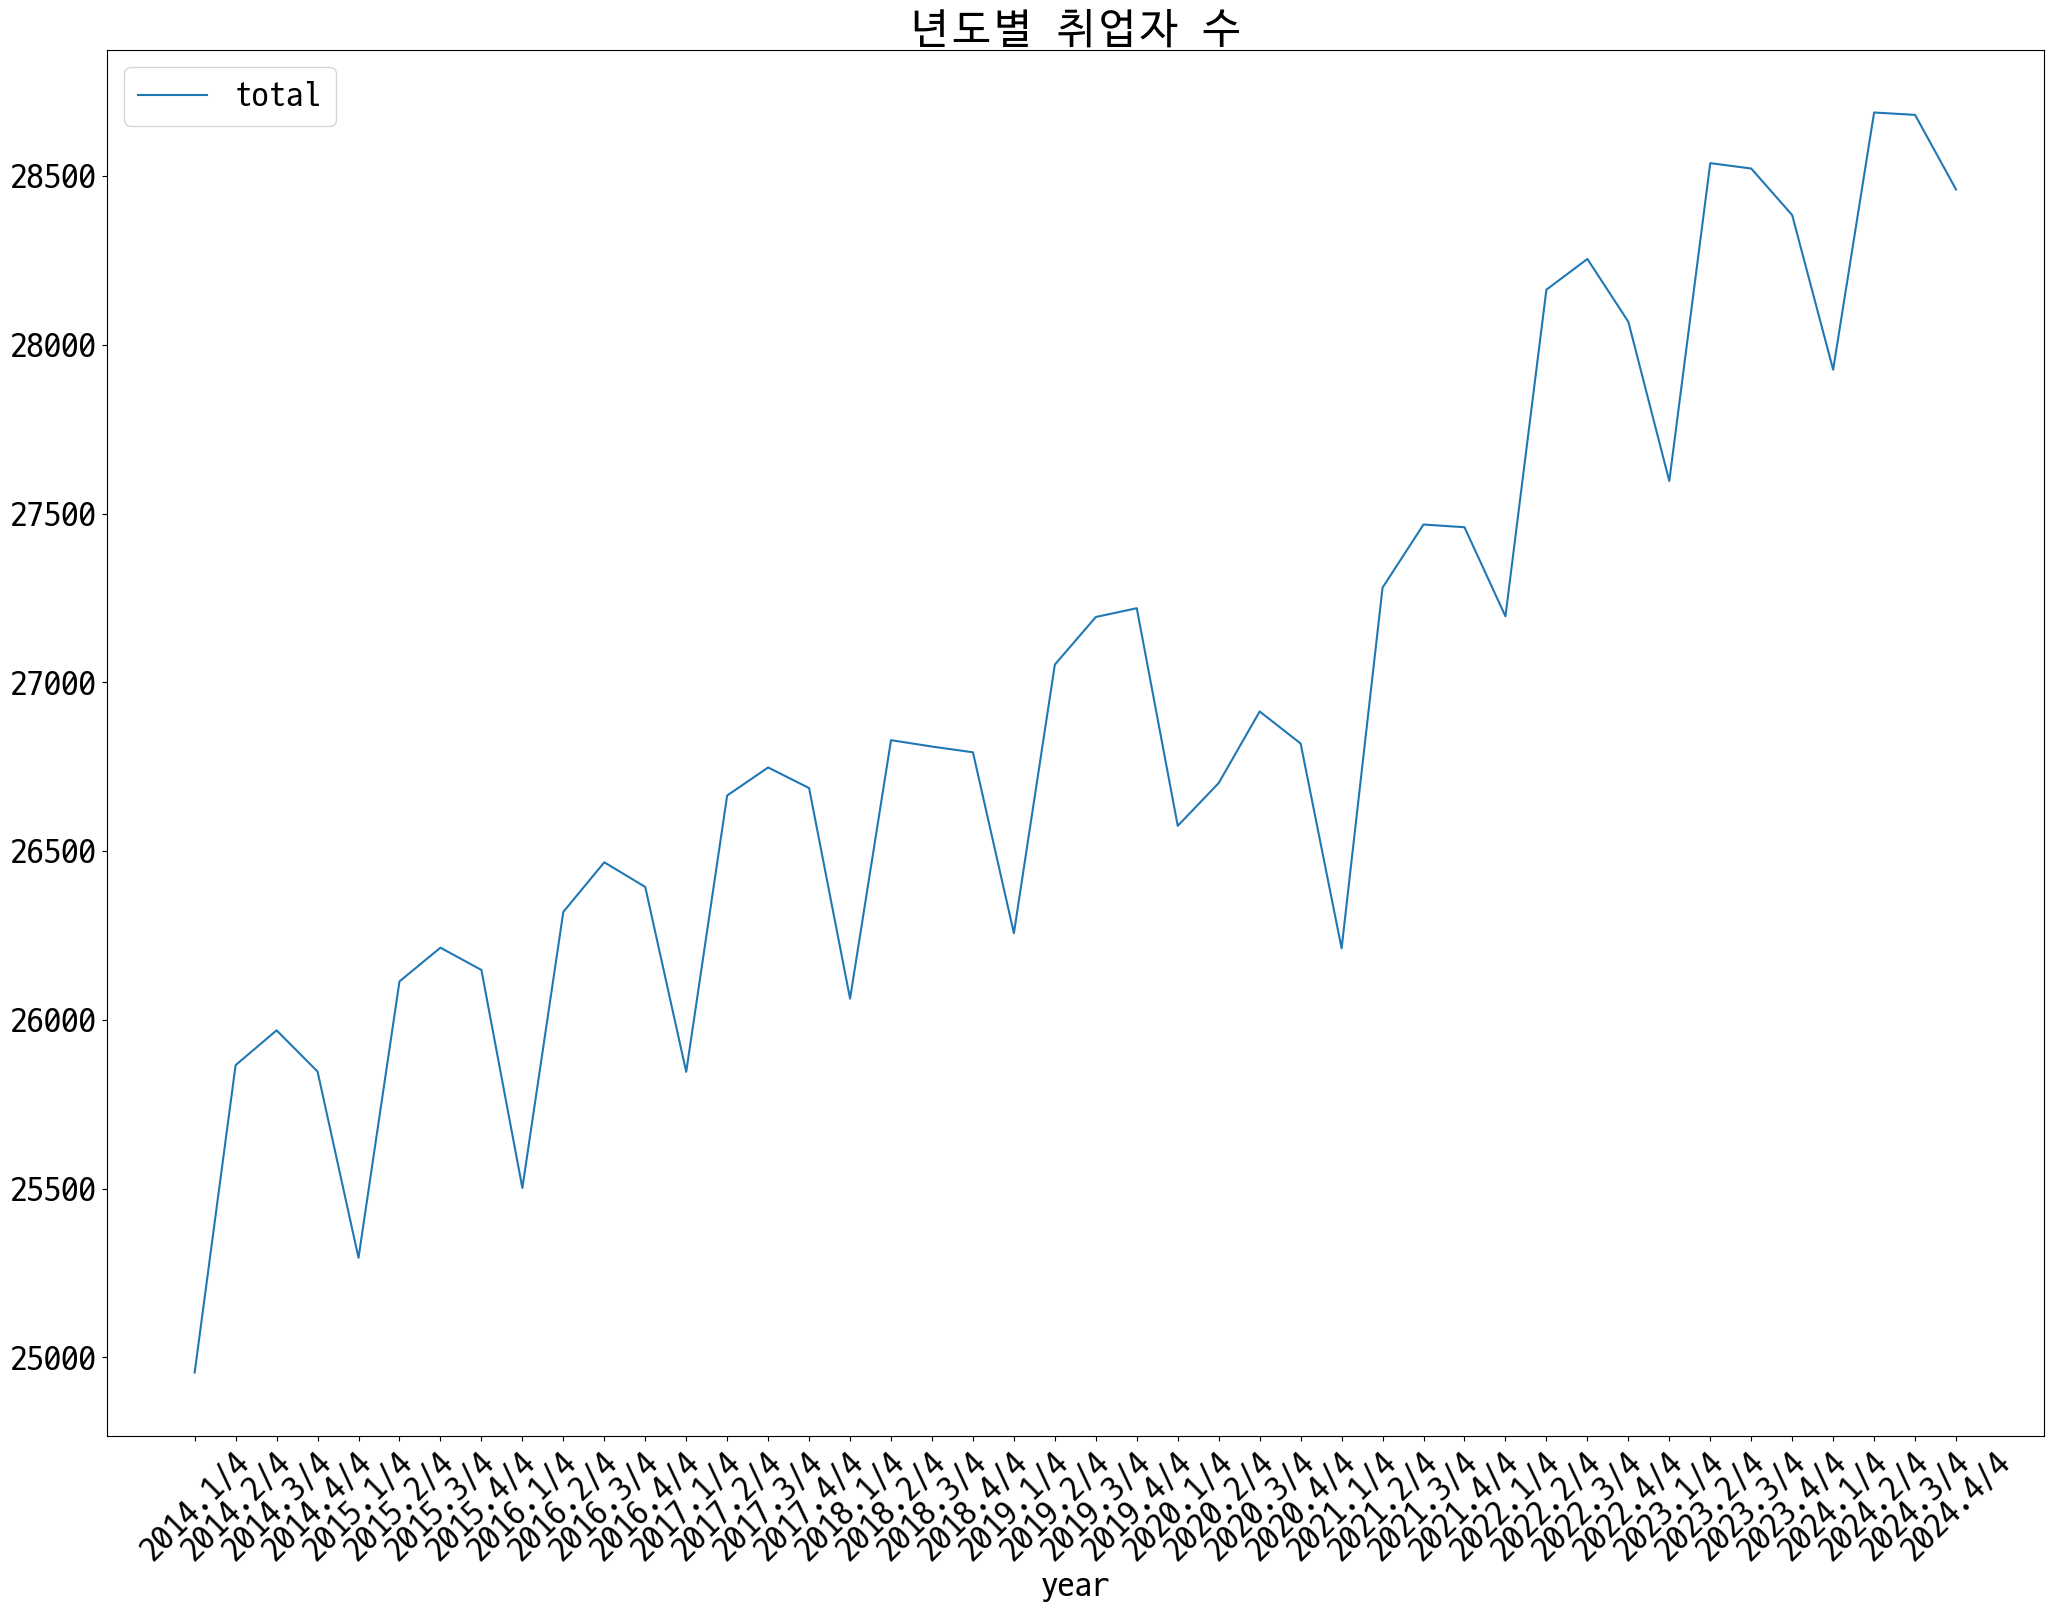

In [18]:
file_path="../ref/행정구역시도성연령별취업자_20250304.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ex_data = ori.copy()
ex_data.columns = ["resion", "year", "age", "gender", "value"]
ex_data.loc[ex_data["resion"] == "세종특별자치시", "value"] = ex_data.loc[ex_data["resion"] == "세종특별자치시", "value"].replace('-',0)
ex_data["value"] = ex_data["value"].astype(int)
ex1_data = ex_data.groupby("year")["value"].sum().reset_index(name="total")
ax = ex1_data.plot(x="year", y="total", figsize=(25,18), title="년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data["year"], rotation=45)
plt.show()

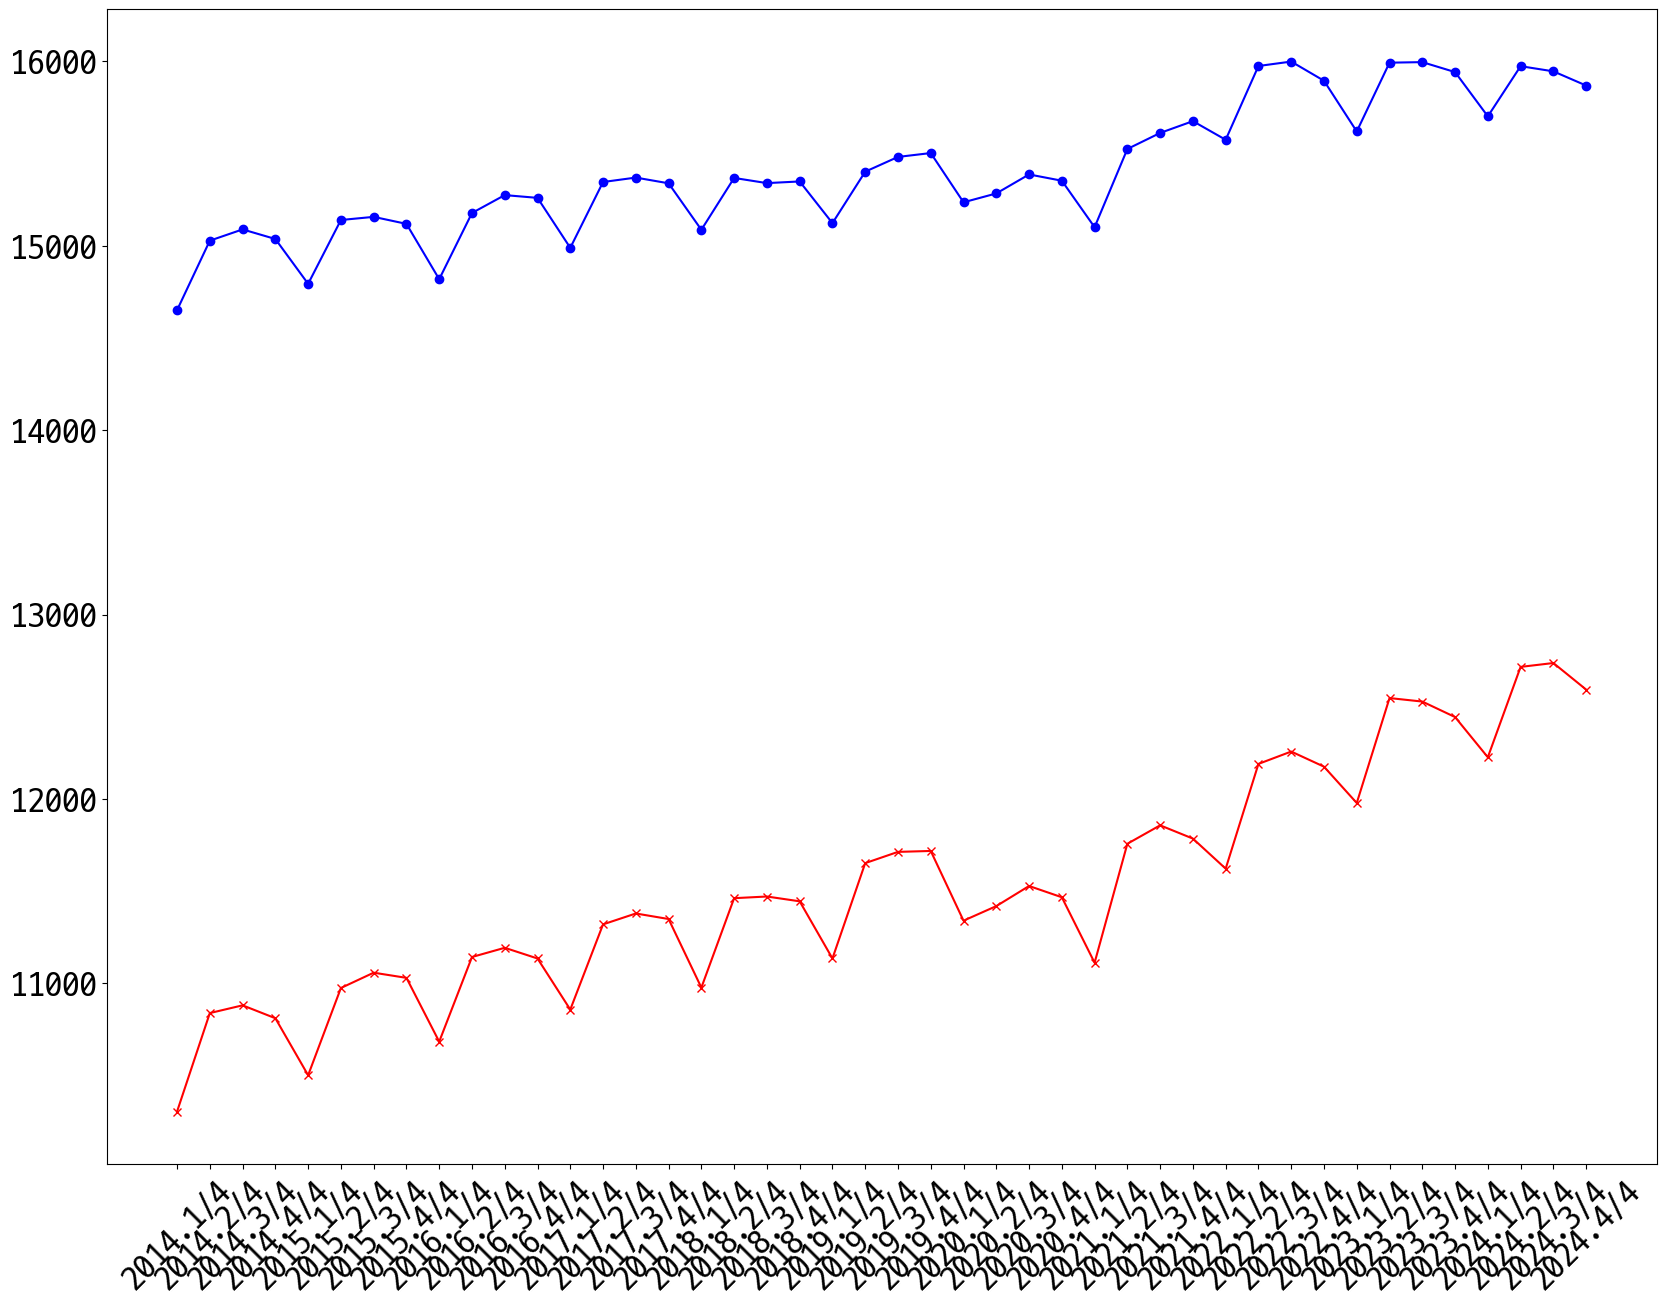

In [20]:
ex_data2 = ori.copy()
ex_data2.columns = ["resion", "year", "age", "gender", "value"]
ex_data2.loc[ex_data2["resion"] == "세종특별자치시", "value"] = ex_data2.loc[ex_data["resion"] == "세종특별자치시", "value"].replace('-',0)
ex_data2["value"] = ex_data2["value"].astype(int)
gen = ex_data2.groupby(["year", "gender"])["value"].sum().reset_index(name="total")
filter_m = gen["gender"]=="남자"
filter_f = gen["gender"]=="여자"
male = gen[filter_m]
female = gen[filter_f]
plt.figure(figsize=(20,15))
plt.plot(male["year"], male["total"], label="남자", color="blue", linestyle="-", marker="o")
plt.plot(female["year"], female["total"], label="여자", color="red", linestyle="-", marker="x")
plt.xticks(male["year"], rotation=45)
plt.show()